#  ANALYSIS OF FAST FOOD  RESTAURANTS WITH R

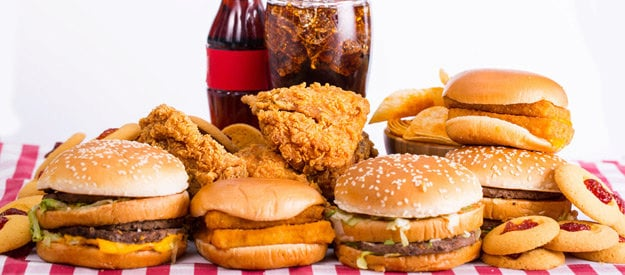

 - Dropping columns
 - Checking null values
 - Summarizing data
 - Cross tabulation
 - Subsets
 - Feature Engineering
 - New variables
 - Variables association: Correlation
 - Using wide and long dataframe format
 - HeatMap
 - Histograms
 - Boxplot
 - Radar
 - Confirmatory analysis
 - T-test for one sample
 - T-test for independent samples
 - ANOVA
 
 
 raulvalerio@gmail.com

### Loading libraries

In [1]:
library(dplyr) ## for summarize data  tidyverse
library(xtable)  ## best table printing
library(stringr)  ## detecting strings
library(ggplot2)  ## graphics

options(warn=-1)  # turn off warning  , change warn = 0 to turn on


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Loading data

In [2]:
fastfood= read.csv("fast_food.csv")   #  "path/file.csv"

In [3]:
dim( fastfood )

[1] 515  18

## EXPLORATORY DATA ANALYSIS

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

### Inspecting data

* gain valuable insights by visualizing and interacting with your data
* summary of the contents of an object
* Most useful as a way to get a quick overview of the variables in data frame

In [4]:
head(fastfood)

,X,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2,0.0,95,1110,44,3,11,37,4,20,20,Other
2,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17,1.5,130,1580,62,2,18,46,6,20,20,Other
3,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27,3.0,220,1920,63,3,18,70,10,20,50,Other
4,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0.5,155,1940,62,2,18,55,6,25,20,Other
5,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0.5,120,1980,81,4,18,46,6,20,20,Other
6,6,Mcdonalds,Big Mac,540,250,28,10,1.0,80,950,46,3,9,25,10,2,15,Other


In [5]:
glimpse(fastfood)

Rows: 515
Columns: 18
$ X           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ restaurant  <chr> "Mcdonalds", "Mcdonalds", "Mcdonalds", "Mcdonalds", "Mc...
$ item        <chr> "Artisan Grilled Chicken Sandwich", "Single Bacon Smoke...
$ calories    <int> 380, 840, 1130, 750, 920, 540, 300, 510, 430, 770, 380,...
$ cal_fat     <int> 60, 410, 600, 280, 410, 250, 100, 210, 190, 400, 170, 3...
$ total_fat   <int> 7, 45, 67, 31, 45, 28, 12, 24, 21, 45, 18, 34, 20, 34, ...
$ sat_fat     <dbl> 2.0, 17.0, 27.0, 10.0, 12.0, 10.0, 5.0, 4.0, 11.0, 21.0...
$ trans_fat   <dbl> 0.0, 1.5, 3.0, 0.5, 0.5, 1.0, 0.5, 0.0, 1.0, 2.5, 0.0, ...
$ cholesterol <int> 95, 130, 220, 155, 120, 80, 40, 65, 85, 175, 40, 95, 12...
$ sodium      <int> 1110, 1580, 1920, 1940, 1980, 950, 680, 1040, 1040, 129...
$ total_carb  <int> 44, 62, 63, 62, 81, 46, 33, 49, 35, 42, 38, 48, 48, 67,...
$ fiber       <int> 3, 2, 3, 2, 4, 3, 2, 3, 2, 3, 2, 3, 3, 5, 2, 2, 3, 3, 5...
$ sugar       <int> 11, 18, 18

### Drop columns

In [6]:
fastfood = fastfood[ , -1]  

# -c(1)  
# fastfood[, -which( names(fastfood) == "X" )]

### Summary: mean, median, max, Null and missing values

In [7]:
summary(fastfood)

  restaurant            item              calories         cal_fat      
 Length:515         Length:515         Min.   :  20.0   Min.   :   0.0  
 Class :character   Class :character   1st Qu.: 330.0   1st Qu.: 120.0  
 Mode  :character   Mode  :character   Median : 490.0   Median : 210.0  
                                       Mean   : 530.9   Mean   : 238.8  
                                       3rd Qu.: 690.0   3rd Qu.: 310.0  
                                       Max.   :2430.0   Max.   :1270.0  
                                                                        
   total_fat         sat_fat         trans_fat      cholesterol    
 Min.   :  0.00   Min.   : 0.000   Min.   :0.000   Min.   :  0.00  
 1st Qu.: 14.00   1st Qu.: 4.000   1st Qu.:0.000   1st Qu.: 35.00  
 Median : 23.00   Median : 7.000   Median :0.000   Median : 60.00  
 Mean   : 26.59   Mean   : 8.153   Mean   :0.465   Mean   : 72.46  
 3rd Qu.: 35.00   3rd Qu.:11.000   3rd Qu.:1.000   3rd Qu.: 95.00  
 Max.   

#### Numeric variables only

In [8]:
summary(  Filter(is.numeric, fastfood) )

    calories         cal_fat         total_fat         sat_fat      
 Min.   :  20.0   Min.   :   0.0   Min.   :  0.00   Min.   : 0.000  
 1st Qu.: 330.0   1st Qu.: 120.0   1st Qu.: 14.00   1st Qu.: 4.000  
 Median : 490.0   Median : 210.0   Median : 23.00   Median : 7.000  
 Mean   : 530.9   Mean   : 238.8   Mean   : 26.59   Mean   : 8.153  
 3rd Qu.: 690.0   3rd Qu.: 310.0   3rd Qu.: 35.00   3rd Qu.:11.000  
 Max.   :2430.0   Max.   :1270.0   Max.   :141.00   Max.   :47.000  
                                                                    
   trans_fat      cholesterol         sodium       total_carb    
 Min.   :0.000   Min.   :  0.00   Min.   :  15   Min.   :  0.00  
 1st Qu.:0.000   1st Qu.: 35.00   1st Qu.: 800   1st Qu.: 28.50  
 Median :0.000   Median : 60.00   Median :1110   Median : 44.00  
 Mean   :0.465   Mean   : 72.46   Mean   :1247   Mean   : 45.66  
 3rd Qu.:1.000   3rd Qu.: 95.00   3rd Qu.:1550   3rd Qu.: 57.00  
 Max.   :8.000   Max.   :805.00   Max.   :6080   Max

In [9]:
glimpse(fastfood)

Rows: 515
Columns: 17
$ restaurant  <chr> "Mcdonalds", "Mcdonalds", "Mcdonalds", "Mcdonalds", "Mc...
$ item        <chr> "Artisan Grilled Chicken Sandwich", "Single Bacon Smoke...
$ calories    <int> 380, 840, 1130, 750, 920, 540, 300, 510, 430, 770, 380,...
$ cal_fat     <int> 60, 410, 600, 280, 410, 250, 100, 210, 190, 400, 170, 3...
$ total_fat   <int> 7, 45, 67, 31, 45, 28, 12, 24, 21, 45, 18, 34, 20, 34, ...
$ sat_fat     <dbl> 2.0, 17.0, 27.0, 10.0, 12.0, 10.0, 5.0, 4.0, 11.0, 21.0...
$ trans_fat   <dbl> 0.0, 1.5, 3.0, 0.5, 0.5, 1.0, 0.5, 0.0, 1.0, 2.5, 0.0, ...
$ cholesterol <int> 95, 130, 220, 155, 120, 80, 40, 65, 85, 175, 40, 95, 12...
$ sodium      <int> 1110, 1580, 1920, 1940, 1980, 950, 680, 1040, 1040, 129...
$ total_carb  <int> 44, 62, 63, 62, 81, 46, 33, 49, 35, 42, 38, 48, 48, 67,...
$ fiber       <int> 3, 2, 3, 2, 4, 3, 2, 3, 2, 3, 2, 3, 3, 5, 2, 2, 3, 3, 5...
$ sugar       <int> 11, 18, 18, 18, 18, 9, 7, 6, 7, 10, 5, 11, 11, 11, 6, 3...
$ protein     <int> 37, 46, 70

In [10]:
lapply( fastfood, function(x) sum( is.na(x) )) 

$restaurant
[1] 0

$item
[1] 0

$calories
[1] 0

$cal_fat
[1] 0

$total_fat
[1] 0

$sat_fat
[1] 0

$trans_fat
[1] 0

$cholesterol
[1] 0

$sodium
[1] 0

$total_carb
[1] 0

$fiber
[1] 12

$sugar
[1] 0

$protein
[1] 1

$vit_a
[1] 214

$vit_c
[1] 210

$calcium
[1] 210

$salad
[1] 0

### Categorical variables

In [11]:
table( fastfood$salad )


Other 
  515 

In [12]:
Filter( is.character, fastfood )

restaurant,item,salad
<chr>,<chr>,<chr>
Mcdonalds,Artisan Grilled Chicken Sandwich,Other
Mcdonalds,Single Bacon Smokehouse Burger,Other
Mcdonalds,Double Bacon Smokehouse Burger,Other
Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,Other
Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,Other
Mcdonalds,Big Mac,Other
Mcdonalds,Cheeseburger,Other
Mcdonalds,Classic Chicken Sandwich,Other
Mcdonalds,Double Cheeseburger,Other


In [13]:
lapply( Filter( is.character, fastfood ), table)

$restaurant

      Arbys Burger King Chick Fil-A Dairy Queen   Mcdonalds       Sonic 
         55          70          27          42          57          53 
     Subway   Taco Bell 
         96         115 

$item

                                         1 Piece Chick-n-Strips 
                                                              1 
                             1/2 lb. FlameThrowerÂ® GrillBurger 
                                                              1 
                                1/2 lb. GrillBurger with Cheese 
                                                              1 
                                 1/2 lb.* Cheesy Potato Burrito 
                                                              1 
                                         1/2 lb.* Combo Burrito 
                                                              1 
                               1/4 lb. Bacon Cheese GrillBurger 
                                                              1 
   

In [14]:
table( fastfood$restaurant)


      Arbys Burger King Chick Fil-A Dairy Queen   Mcdonalds       Sonic 
         55          70          27          42          57          53 
     Subway   Taco Bell 
         96         115 

In [15]:
xtable(  table( fastfood$restaurant), caption = 'Restaurants')

,V1
,<int>
Arbys,55
Burger King,70
Chick Fil-A,27
Dairy Queen,42
Mcdonalds,57
Sonic,53
Subway,96
Taco Bell,115


### Grouping variables

In [16]:
fastfood %>% group_by(restaurant)   %>%
          summarise ( mean_calories= mean(calories), mean_trans_fat= mean(trans_fat), mean_cholesterol= mean(cholesterol))

`summarise()` ungrouping output (override with `.groups` argument)



restaurant,mean_calories,mean_trans_fat,mean_cholesterol
<chr>,<dbl>,<dbl>,<dbl>
Arbys,532.7273,0.41818182,70.45455
Burger King,608.5714,0.86428571,100.85714
Chick Fil-A,384.4444,0.03703704,79.07407
Dairy Queen,520.2381,0.67857143,71.54762
Mcdonalds,640.3509,0.46491228,109.73684
Sonic,631.6981,0.93396226,86.98113
Subway,503.0208,0.21875000,61.30208
Taco Bell,443.6522,0.25652174,39.04348


## Creating subsets

#### By restaurant

In [17]:
mcdonald= fastfood[ fastfood$restaurant == "Mcdonalds", -1]  ##eliminate first column

In [18]:
dim( mcdonald )

[1] 57 16

In [19]:
fastfood %>% filter( restaurant == "Mcdonalds")

restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3,11,37,4,20,20,Other
Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2,18,46,6,20,20,Other
Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3,18,70,10,20,50,Other
Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2,18,55,6,25,20,Other
Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4,18,46,6,20,20,Other
Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3,9,25,10,2,15,Other
Mcdonalds,Cheeseburger,300,100,12,5.0,0.5,40,680,33,2,7,15,10,2,10,Other
Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3,6,25,0,4,2,Other
Mcdonalds,Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2,7,25,20,4,15,Other


In [20]:
BurgerKing= fastfood[fastfood$restaurant == "Burger King", -1] 

In [21]:
dim(BurgerKing)

[1] 70 16

In [22]:
head(BurgerKing)

,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
193,American Brewhouse King,1550,1134,126,47,8.0,805,1820,21,3,7,134,NA,NA,NA,Other
194,Bacon & Swiss Sourdough King,1000,585,65,24,3.0,200,1320,48,2,8,56,NA,NA,NA,Other
195,Bacon Cheeseburger,330,140,16,7,0.0,55,830,32,1,7,18,NA,NA,NA,Other
196,Bacon Cheeseburger Deluxe,290,120,14,6,0.5,40,720,28,1,7,12,NA,NA,NA,Other
197,Bacon King,1040,630,48,28,2.5,220,1900,48,1,10,57,NA,NA,NA,Other
198,Bacon King Jr,730,351,39,9,0.0,90,1930,63,0,16,32,NA,NA,NA,Other


#### By item

In [23]:
burgers= fastfood[ str_detect( fastfood$item, "Burger|burger"), ]   #urger

In [24]:
dim(burgers)

[1] 56 17

In [25]:
head(burgers)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17,1.5,130,1580,62,2,18,46,6,20,20,Other
3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27,3.0,220,1920,63,3,18,70,10,20,50,Other
7,Mcdonalds,Cheeseburger,300,100,12,5,0.5,40,680,33,2,7,15,10,2,10,Other
9,Mcdonalds,Double Cheeseburger,430,190,21,11,1.0,85,1040,35,2,7,25,20,4,15,Other
12,Mcdonalds,Garlic White Cheddar Burger,620,300,34,13,1.5,95,790,48,3,11,32,10,10,35,Other
15,Mcdonalds,Hamburger,250,70,8,3,0.0,30,480,31,2,6,13,2,2,4,Other


In [26]:
sandwich= fastfood[ str_detect(fastfood$item,"Sandwich"),]

In [27]:
dim(sandwich)

[1] 72 17

In [28]:
head(sandwich)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2,0.0,95,1110,44,3,11,37,4,20,20,Other
4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0.5,155,1940,62,2,18,55,6,25,20,Other
5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0.5,120,1980,81,4,18,46,6,20,20,Other
8,Mcdonalds,Classic Chicken Sandwich,510,210,24,4,0.0,65,1040,49,3,6,25,0,4,2,Other
13,Mcdonalds,Grilled Garlic White Cheddar Chicken Sandwich,530,180,20,7,0.0,125,1150,48,3,11,42,10,20,35,Other
14,Mcdonalds,Crispy Garlic White Cheddar Chicken Sandwich,700,300,34,9,0.0,85,1190,67,5,11,33,10,15,35,Other


In [29]:
burrito= fastfood[ str_detect(fastfood$item,"Burrito"),]

In [30]:
dim(burrito)

[1] 34 17

In [31]:
head(burrito)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
401,Taco Bell,1/2 lb.* Cheesy Potato Burrito,540,230,26,7,1,45,1360,59,7,4,19,NA,NA,NA,Other
402,Taco Bell,1/2 lb.* Combo Burrito,460,170,18,7,1,45,1320,53,9,3,21,NA,NA,NA,Other
403,Taco Bell,7-Layer Burrito,510,170,19,7,0,20,1090,68,11,4,16,NA,NA,NA,Other
404,Taco Bell,Bean Burrito,370,100,11,4,0,5,960,56,9,3,13,NA,NA,NA,Other
405,Taco Bell,Beefy 5-Layer Burrito,550,200,22,8,0,35,1270,68,8,5,19,NA,NA,NA,Other
406,Taco Bell,Beefy FritosÂ® Burrito,440,160,18,5,0,20,1030,55,4,3,13,NA,NA,NA,Other


### Feature engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques.

In [32]:
fastfood$burger = ifelse( str_detect(fastfood$item,"Burger|burger"), 1, 0)

In [33]:
table( fastfood$burger )


  0   1 
459  56 

In [34]:
fastfood$sandwich = ifelse( str_detect(fastfood$item,"Sandwich"), 1, 0)

In [35]:
table( fastfood$sandwich)


  0   1 
443  72 

In [36]:
head(fastfood)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad,burger,sandwich
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2,0.0,95,1110,44,3,11,37,4,20,20,Other,0,1
2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17,1.5,130,1580,62,2,18,46,6,20,20,Other,1,0
3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27,3.0,220,1920,63,3,18,70,10,20,50,Other,1,0
4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0.5,155,1940,62,2,18,55,6,25,20,Other,0,1
5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0.5,120,1980,81,4,18,46,6,20,20,Other,0,1
6,Mcdonalds,Big Mac,540,250,28,10,1.0,80,950,46,3,9,25,10,2,15,Other,0,0


### CORRELATION

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.

In [37]:
cor(burgers[,- c(1,2,17)])  ## pearson  ,  method= "spearman"

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
calories,1.0000000,0.984228007,0.982521831,0.9573495,0.9183227,0.9401213,0.8061894,0.4288717,0.103892196,0.3473849,0.96938862,NA,NA,NA
cal_fat,0.9842280,1.000000000,0.999695008,0.9681769,0.9247431,0.9493495,0.7396654,0.2944452,0.002033945,0.2328010,0.94949767,NA,NA,NA
total_fat,0.9825218,0.999695008,1.000000000,0.9672518,0.9244154,0.9484948,0.7331881,0.2876584,-0.005469744,0.2259739,0.94691315,NA,NA,NA
sat_fat,0.9573495,0.968176871,0.967251815,1.0000000,0.9541579,0.9912261,0.7327964,0.2015687,-0.103598084,0.2161788,0.96010148,NA,NA,NA
trans_fat,0.9183227,0.924743086,0.924415434,0.9541579,1.0000000,0.9497475,0.6394343,0.2128406,-0.102013981,0.1807163,0.91443588,NA,NA,NA
cholesterol,0.9401213,0.949349468,0.948494766,0.9912261,0.9497475,1.0000000,0.6981946,0.1732615,-0.139855645,0.2382469,0.96519664,NA,NA,NA
sodium,0.8061894,0.739665373,0.733188104,0.7327964,0.6394343,0.6981946,1.0000000,0.5988486,0.311421742,0.5044294,0.79708654,NA,NA,NA
total_carb,0.4288717,0.294445190,0.287658446,0.2015687,0.2128406,0.1732615,0.5988486,1.0000000,0.714665414,0.6381526,0.34144594,NA,NA,NA
fiber,0.1038922,0.002033945,-0.005469744,-0.1035981,-0.1020140,-0.1398556,0.3114217,0.7146654,1.000000000,0.3296157,0.04266838,NA,NA,NA
sugar,0.3473849,0.232801025,0.225973881,0.2161788,0.1807163,0.2382469,0.5044294,0.6381526,0.329615745,1.0000000,0.37518374,NA,NA,NA


In [38]:
cor_burgers <- round( cor( burgers[,-c(1,2,14:17)]  ),2 )
head(cor_burgers)

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
calories,1.00,0.98,0.98,0.96,0.92,0.94,0.81,0.43,0.10,0.35,0.97
cal_fat,0.98,1.00,1.00,0.97,0.92,0.95,0.74,0.29,0.00,0.23,0.95
total_fat,0.98,1.00,1.00,0.97,0.92,0.95,0.73,0.29,-0.01,0.23,0.95
sat_fat,0.96,0.97,0.97,1.00,0.95,0.99,0.73,0.20,-0.10,0.22,0.96
trans_fat,0.92,0.92,0.92,0.95,1.00,0.95,0.64,0.21,-0.10,0.18,0.91
cholesterol,0.94,0.95,0.95,0.99,0.95,1.00,0.70,0.17,-0.14,0.24,0.97


### Using ggplot for plotting

In [39]:
library(reshape2)  ##  wide  --> long

melted_burgers <- melt( cor_burgers )

head(melted_burgers)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,calories,calories,1.00
2,cal_fat,calories,0.98
3,total_fat,calories,0.98
4,sat_fat,calories,0.96
5,trans_fat,calories,0.92
6,cholesterol,calories,0.94


In [40]:
tail( melted_burgers)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
116,cholesterol,protein,0.97
117,sodium,protein,0.80
118,total_carb,protein,0.34
119,fiber,protein,0.04
120,sugar,protein,0.38
121,protein,protein,1.00


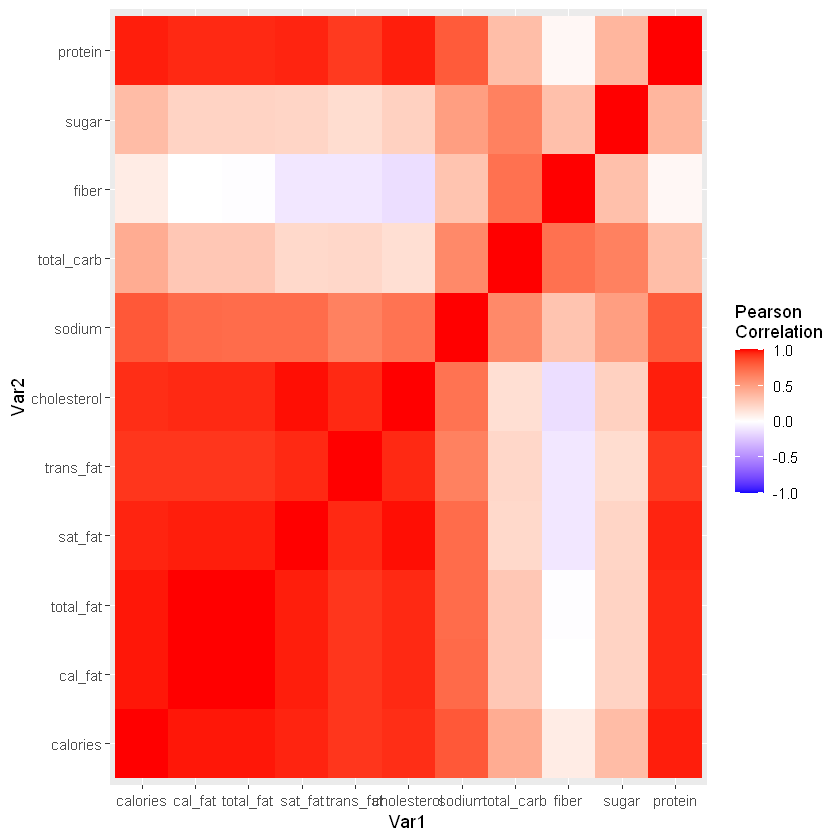

In [41]:
# -->This is the most basic heatmap you can build with R and ggplot2, using the geom_tile() function.

ggplot( data = melted_burgers, aes( x= Var1 , y=Var2, fill=value) ) + 
  geom_tile() + 

 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation")

### Data Comparison with Boxplot

##### Trans Fat

In [42]:
library(ggplot2)

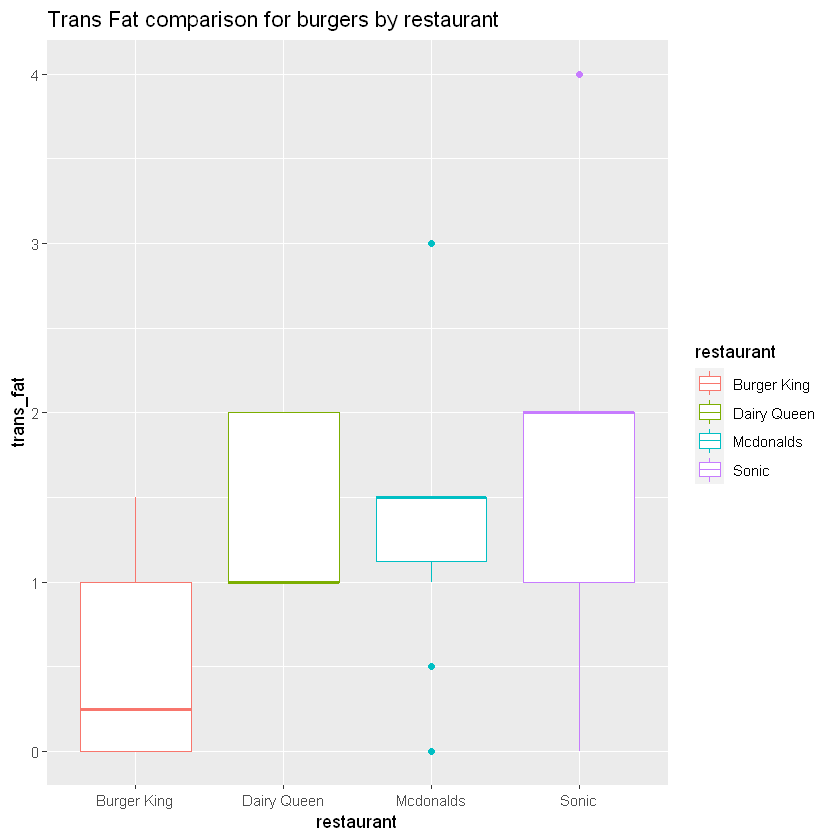

In [43]:
ggplot(data= burgers, mapping = aes(x= restaurant, y=trans_fat, color= restaurant) ) +  geom_boxplot() +
      ggtitle("Trans Fat comparison for burgers by restaurant")

###### Cholesterol

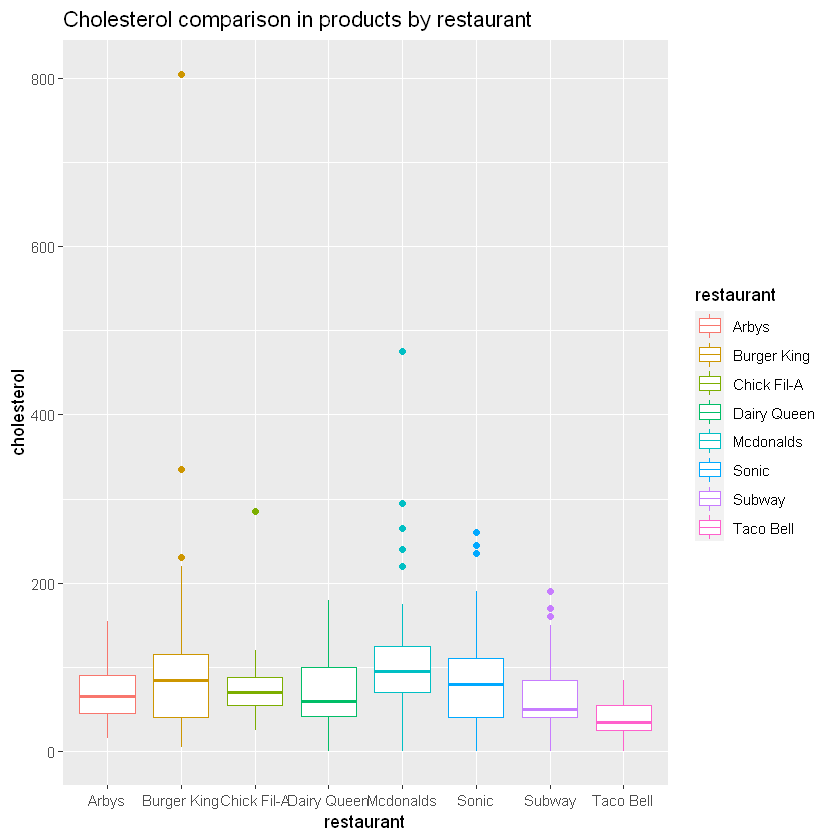

In [44]:
ggplot(data= fastfood, mapping = aes(x= restaurant, y=cholesterol, color= restaurant) ) +  geom_boxplot() +
      ggtitle("Cholesterol comparison in products by restaurant")

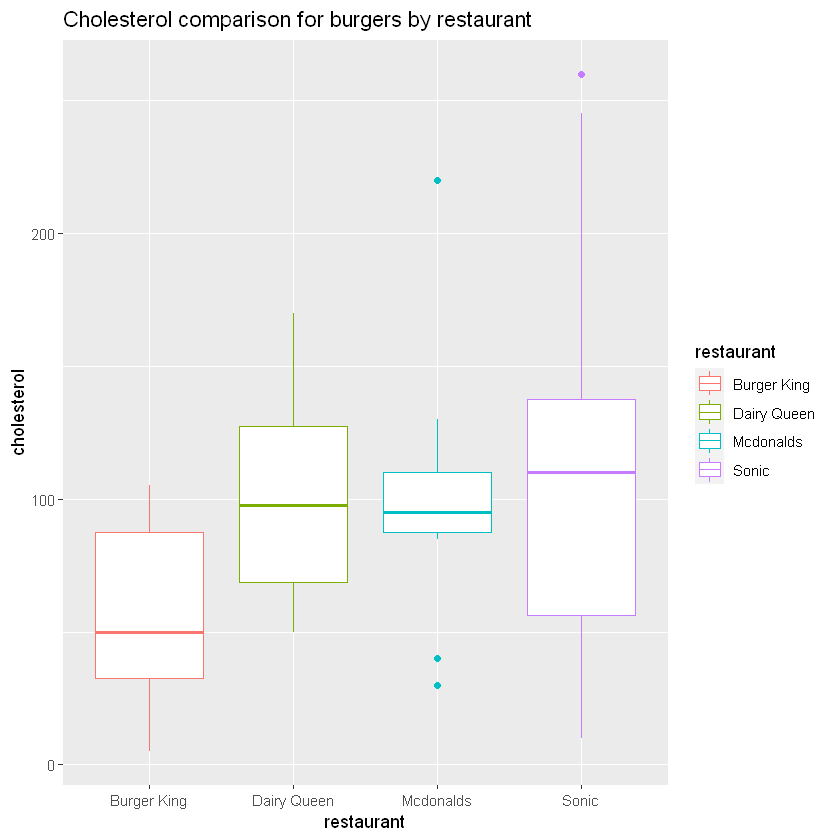

In [45]:
ggplot(data= burgers, mapping = aes(x= restaurant, y=cholesterol, color= restaurant) ) +  geom_boxplot() +
      ggtitle("Cholesterol comparison for burgers by restaurant")

##### Calories

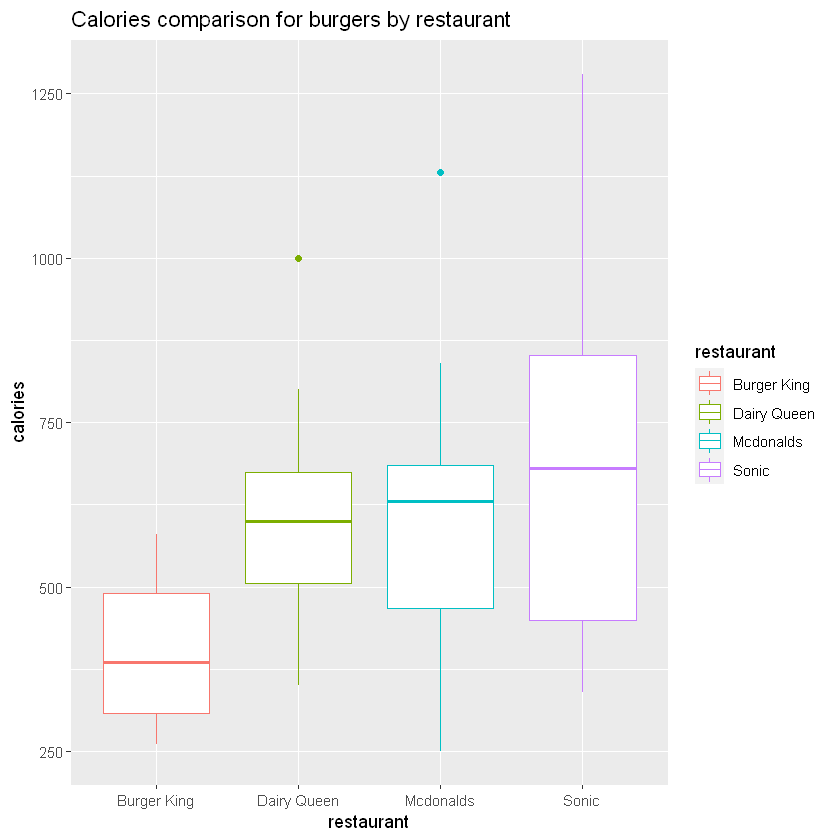

In [46]:
ggplot(data= burgers, mapping = aes(x= restaurant, y=calories, color= restaurant) ) +  geom_boxplot() +
      ggtitle("Calories comparison for burgers by restaurant")

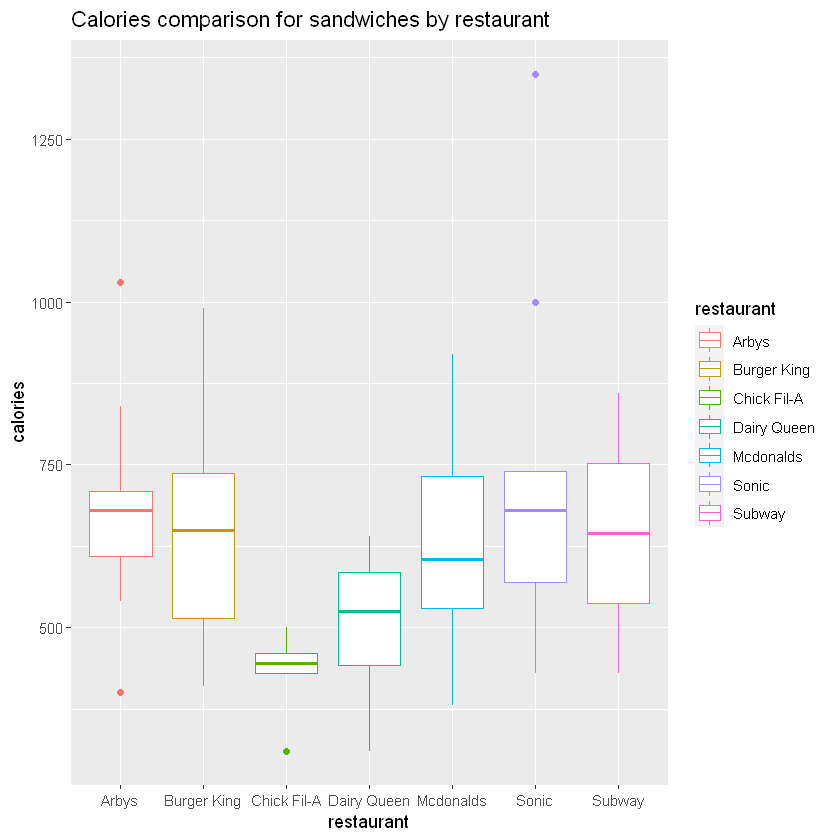

In [47]:
ggplot(data= sandwich, mapping = aes(x= restaurant, y=calories, color= restaurant) ) +  geom_boxplot() +
      ggtitle("Calories comparison for sandwiches by restaurant")

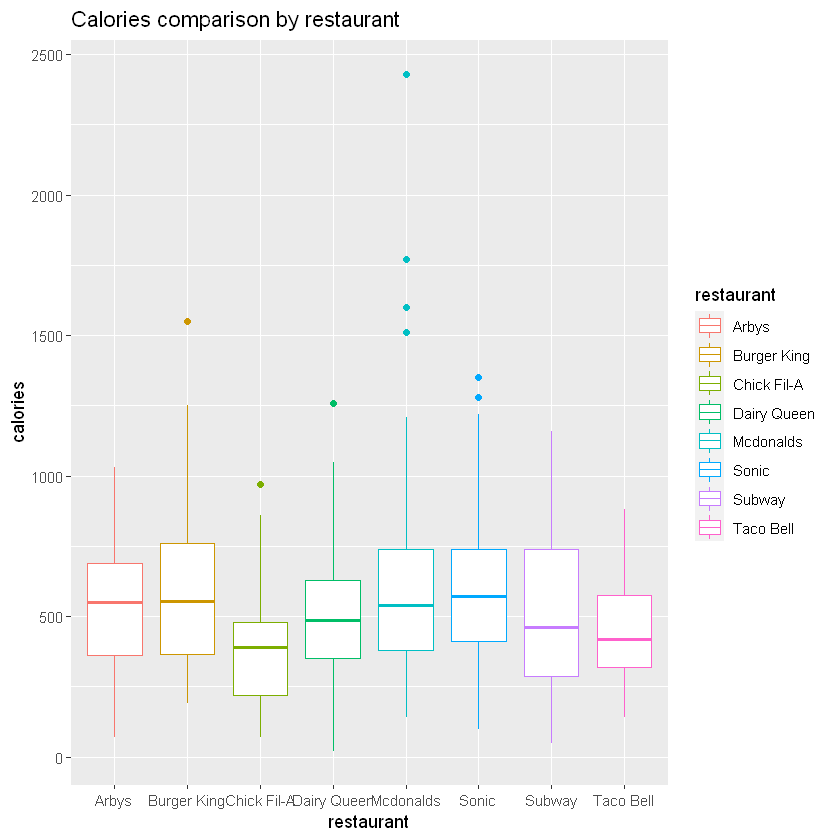

In [48]:
ggplot(data= fastfood, mapping = aes(x= restaurant, y=calories, color= restaurant) ) +  geom_boxplot() +
      ggtitle("Calories comparison by restaurant")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



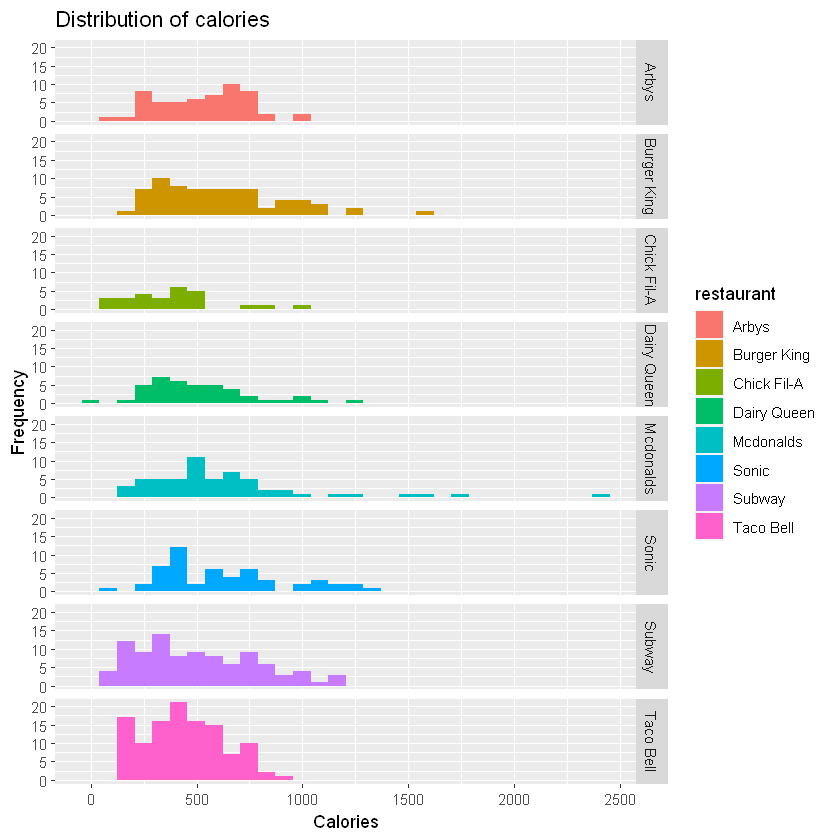

In [49]:
ggplot(data=fastfood, mapping = aes(x= calories) ) +
  geom_histogram( aes(fill= restaurant)) +
  labs(title = "Distribution of calories", 
       x = "Calories",
       y = "Frequency") +
  facet_grid(vars(restaurant))

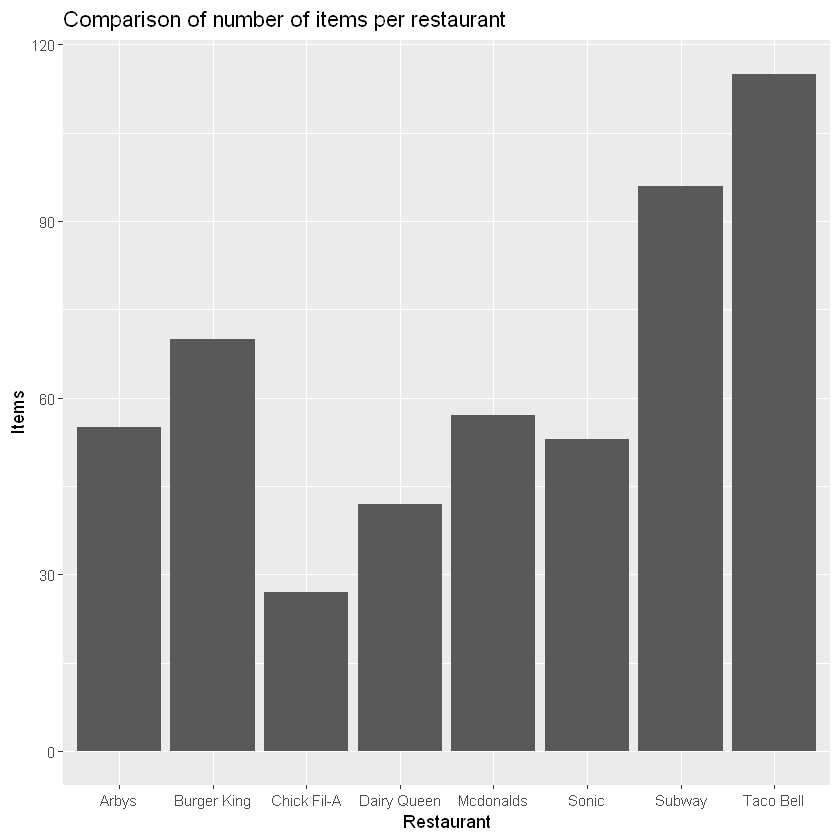

In [50]:
ggplot(data=fastfood, mapping = aes(x= restaurant) ) +
  geom_bar(stat = "count") +
  labs(title = "Comparison of number of items per restaurant", 
       x = "Restaurant",
       y = "Items")

In [51]:
fastfood %>% group_by(restaurant) %>%
             summarize( Burgers = sum(burger), Sandwich= sum(sandwich))

`summarise()` ungrouping output (override with `.groups` argument)



restaurant,Burgers,Sandwich
<chr>,<dbl>,<dbl>
Arbys,0,17
Burger King,12,12
Chick Fil-A,0,8
Dairy Queen,12,8
Mcdonalds,10,16
Sonic,22,9
Subway,0,2
Taco Bell,0,0


In [52]:
## first step -> using group by
## second step--> using melt
#library(dplyr)  ## tidyverse

#burgers ->  true / false  ->  1  /  0
## wide--> long

df1<- 

melt(
    
fastfood %>% group_by(restaurant) %>%
             summarize( Burgers = sum(burger), Sandwich= sum(sandwich))
    
)

df1

`summarise()` ungrouping output (override with `.groups` argument)

Using restaurant as id variables



restaurant,variable,value
<chr>,<fct>,<dbl>
Arbys,Burgers,0
Burger King,Burgers,12
Chick Fil-A,Burgers,0
Dairy Queen,Burgers,12
Mcdonalds,Burgers,10
Sonic,Burgers,22
Subway,Burgers,0
Taco Bell,Burgers,0
Arbys,Sandwich,17


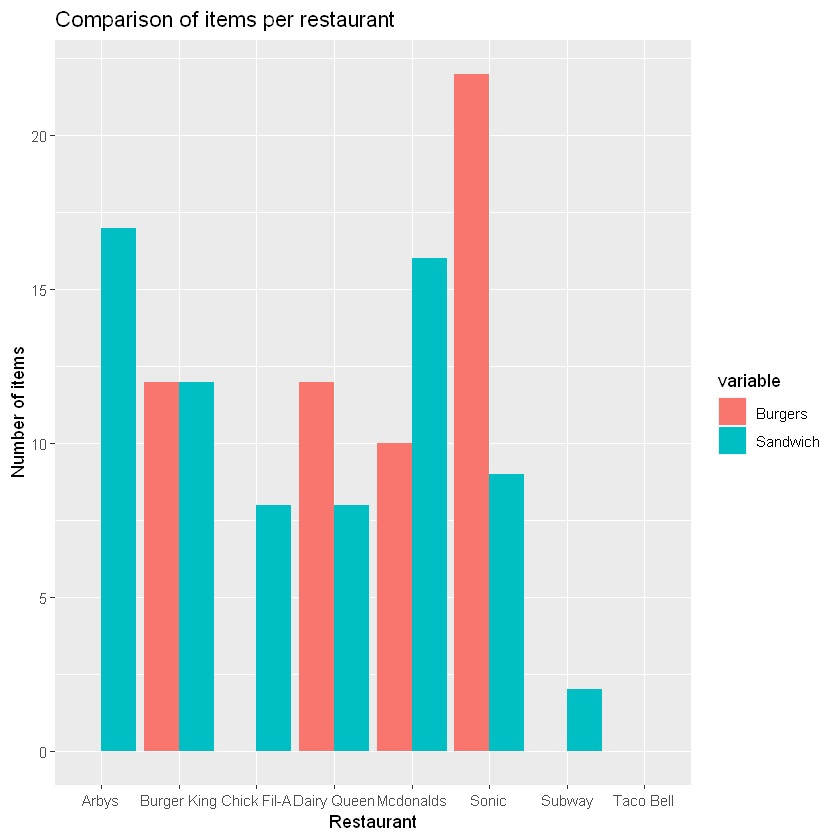

In [53]:
ggplot(data=df1, mapping = aes(x= restaurant, y=value, fill = variable) ) +
  geom_col(position="dodge") +      ##  what if we use  identity??
  labs(title = "Comparison of items per restaurant", 
       x = "Restaurant",
       y = "Number of items")


### Create radar (spider)

#### Compare different means by restaurant

In [54]:
# devtools::install_github("ricardo-bion/ggradar", dependencies = TRUE)

library(ggradar)   

In [55]:
burgers_radar<-
  burgers %>% 
     select(restaurant,calories,cal_fat, cholesterol,sodium, fiber, sugar, protein) %>%
     group_by(restaurant) %>%
     summarize_all(mean)

burgers_radar

restaurant,calories,cal_fat,cholesterol,sodium,fiber,sugar,protein
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Burger King,403.3333,181.6667,55.0000,851.6667,1.750000,7.666667,20.58333
Dairy Queen,606.6667,314.1667,102.0833,1095.0000,1.583333,9.666667,29.75000
Mcdonalds,615.0000,296.0000,101.0000,1099.0000,2.800000,11.100000,33.70000
Sonic,721.8182,399.5455,117.2727,1148.6364,2.181818,7.318182,34.90909


####  Scaling data

In [56]:
scale( burgers_radar[,-1])  ## what is the problem here??   ---> z =  ( x - xm ) / sigma  normal

calories,cal_fat,cholesterol,sodium,fiber,sugar,protein
-1.3785645,-1.29593833,-1.4418296,-1.4747486,-0.6055738,-0.7164251,-1.410851610
0.1500730,0.18206769,0.3060557,0.3476939,-0.9125467,0.4107276,0.002218871
0.2127221,-0.02057716,0.2658389,0.3776518,1.3283554,1.2185205,0.611123787
1.0157694,1.13444779,0.8699350,0.7494029,0.1897651,-0.9128230,0.797508952


#### Normalize data

In [57]:
normalize  <- function(x) {
  
     x =  (x - min(x) )/ (  max(x) - min(x) )
     
     return(x)
}

In [58]:
lapply(burgers_radar[,-1] , normalize)

$calories
[1] 0.0000000 0.6384396 0.6646051 1.0000000

$cal_fat
[1] 0.0000000 0.6081363 0.5247566 1.0000000

$cholesterol
[1] 0.0000000 0.7560827 0.7386861 1.0000000

$sodium
[1] 0.0000000 0.8193878 0.8328571 1.0000000

$fiber
[1] 0.1369863 0.0000000 1.0000000 0.4919054

$sugar
[1] 0.09214744 0.62099359 1.00000000 0.00000000

$protein
[1] 0.0000000 0.6398731 0.9156002 1.0000000

In [59]:
myradar<- data.frame ( burgers_radar["restaurant"], lapply(burgers_radar[,-1] , normalize))
myradar

restaurant,calories,cal_fat,cholesterol,sodium,fiber,sugar,protein
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Burger King,0.0000000,0.0000000,0.0000000,0.0000000,0.1369863,0.09214744,0.0000000
Dairy Queen,0.6384396,0.6081363,0.7560827,0.8193878,0.0000000,0.62099359,0.6398731
Mcdonalds,0.6646051,0.5247566,0.7386861,0.8328571,1.0000000,1.00000000,0.9156002
Sonic,1.0000000,1.0000000,1.0000000,1.0000000,0.4919054,0.00000000,1.0000000


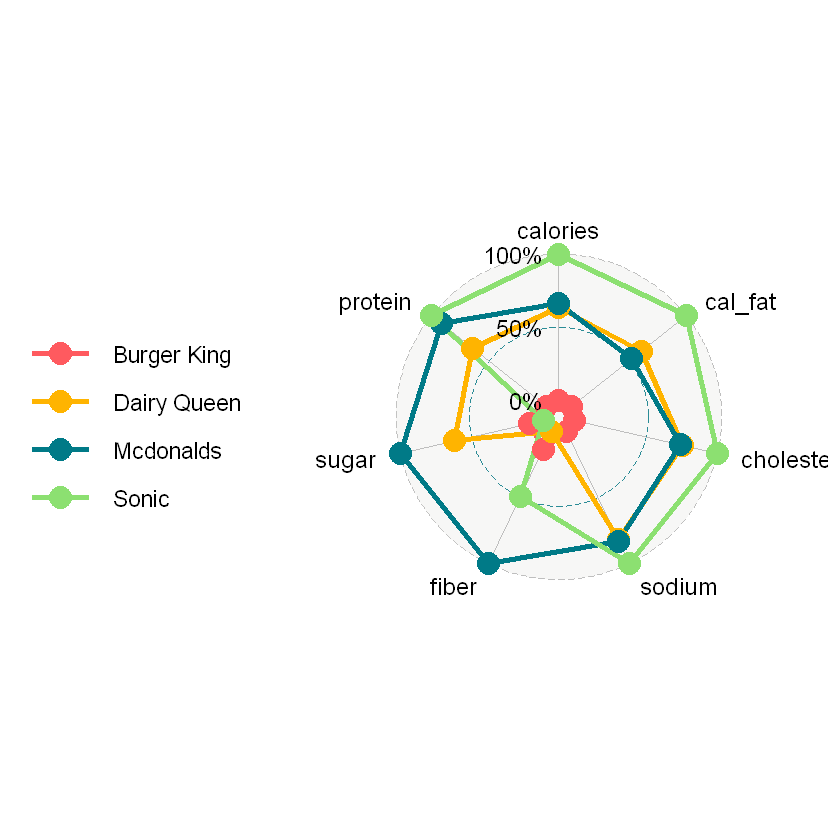

In [60]:
ggradar( as.data.frame(myradar) )

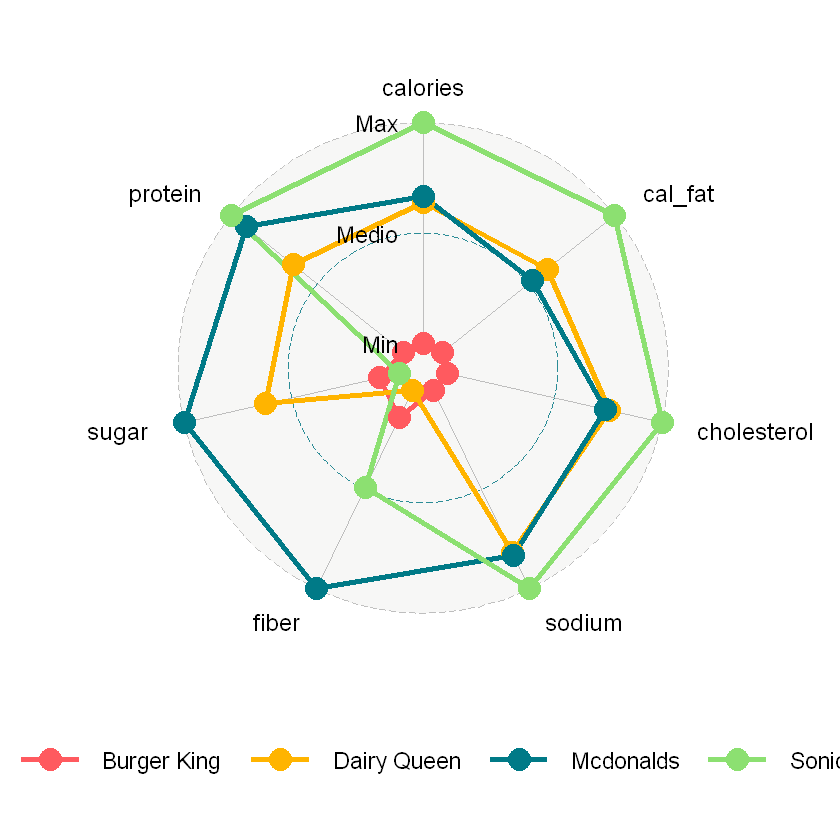

In [61]:
ggradar(
  myradar, 
  values.radar = c("Min", "Medio", "Max"),
  grid.min = 0, grid.mid = 0.5, grid.max = 1,
  legend.position="bottom"
)

### CONFIRMATORY DATA ANALYSIS

* Confirmatory Data Analysis is the part where you evaluate your evidence using traditional statistical tools such as significance, inference, and confidence.
* A statistical analysis designed to address one or more specific research questions, generally with the aim of confirming preconceived hypotheses.

#### Some examples are:

* One sample t test
* Paired (matched) t test
* Two independent samples
* Variance test (Chi square)
* Wilcoxon signed rank test for dependent samples or one sample
* Wilcoxon - Mann (Mann - Whitney) for independent samples
* ANOVA one way
* ANOVA Two ways
* Multiple comparisons
* Kruskal Wallis Test

                        Hypothesis Test -> One sample
                        
\begin{align}
H_0: \mu  =  600 \\
H_1: \mu \neq 600 \\
\end{align}

In [62]:
mean (burgers$calories)

[1] 609.8214

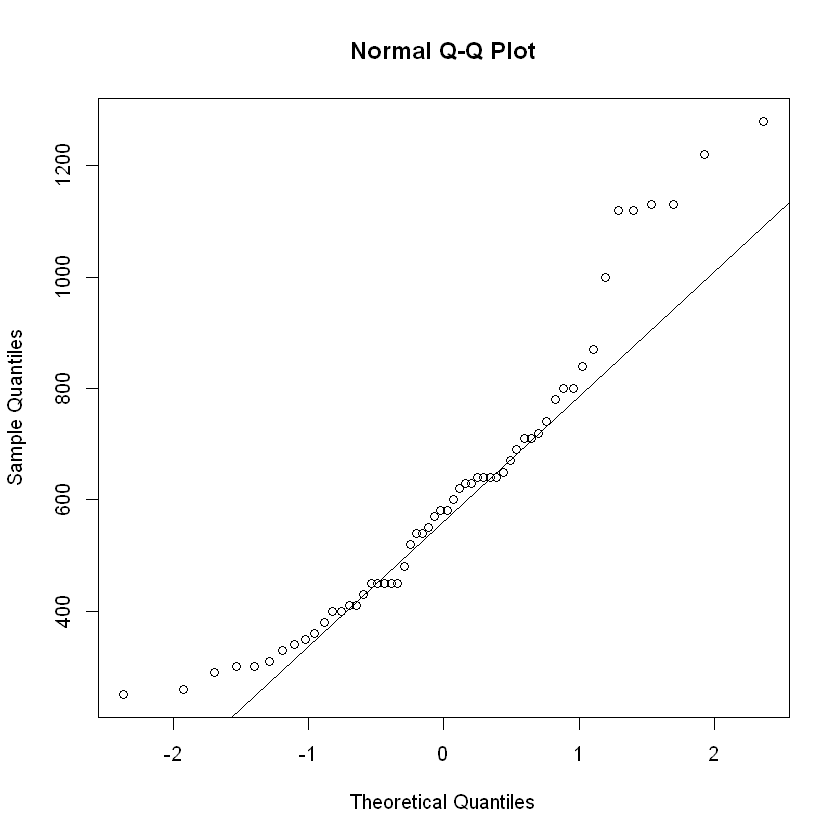

In [63]:
qqnorm(burgers$calories)
qqline(burgers$calories)

In [64]:
t.test( burgers$calories , mu = 600, alternative = "two.sided") # greater, less


	One Sample t-test

data:  burgers$calories
t = 0.28482, df = 55, p-value = 0.7769
alternative hypothesis: true mean is not equal to 600
95 percent confidence interval:
 540.7165 678.9263
sample estimates:
mean of x 
 609.8214 


                        Hypothesis Test -> Two independent samples

### calories in burgers: two independent samples comparison

Hypothesis based in observations from previous graphs

\begin{align}
H_0: \mu_1  = \mu_2 \\
H_1: \mu_1 \neq \mu_2 \\
\end{align}

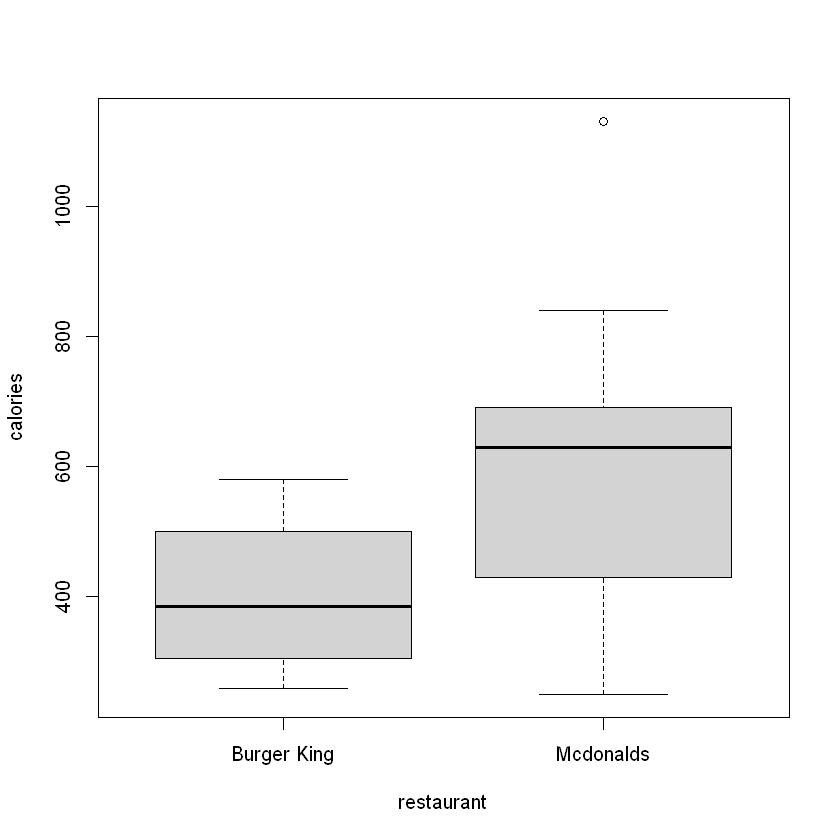

In [65]:
boxplot( calories ~ restaurant  ,data= burgers[ burgers$restaurant== "Mcdonalds" | burgers$restaurant== "Burger King", ])

In [66]:
var.test(burgers$calories[ burgers$restaurant== "Mcdonalds"] , burgers$calories[ burgers$restaurant== "Burger King"])


	F test to compare two variances

data:  burgers$calories[burgers$restaurant == "Mcdonalds"] and burgers$calories[burgers$restaurant == "Burger King"]
F = 5.3905, num df = 9, denom df = 11, p-value = 0.01112
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  1.502404 21.087930
sample estimates:
ratio of variances 
          5.390473 


In [67]:
## Formula interface
t.test(calories ~ restaurant, data = burgers[ burgers$restaurant== "Mcdonalds" | burgers$restaurant== "Burger King", ] )


	Welch Two Sample t-test

data:  calories by restaurant
t = -2.4267, df = 11.768, p-value = 0.03229
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -402.12972  -21.20362
sample estimates:
mean in group Burger King   mean in group Mcdonalds 
                 403.3333                  615.0000 


#### Wilcoxon Rank test

In [68]:
wilcox.test( burgers$calories, mu=600)


	Wilcoxon signed rank test with continuity correction

data:  burgers$calories
V = 708, p-value = 0.6063
alternative hypothesis: true location is not equal to 600


If not paired --> Mann- Whitney

In [69]:
wilcox.test(burgers$calories,sandwich$calories, paired=FALSE, conf.int = TRUE)


	Wilcoxon rank sum test with continuity correction

data:  burgers$calories and sandwich$calories
W = 1805.5, p-value = 0.313
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -109.99996   39.99997
sample estimates:
difference in location 
             -39.99997 


### ANOVA

### Analysis of Variance

Hypothesis based in observations from previous graphs

\begin{align}
H_0: \mu_1  = \mu_2 =...= \mu_i \\
H_1: \exists i,  \mu_i \neq \mu_j, j \in K\\
\end{align}

From wiki: Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. 

* ANOVA was developed by the statistician Ronald Fisher. 
* ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation.
* In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

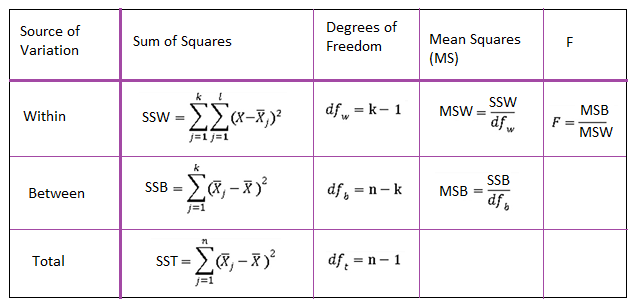

#### calories in burgers by restaurant

In [70]:
mean( burgers$calories[ burgers$restaurant== "Mcdonalds" ] )

[1] 615

In [71]:
library(ggplot2)

library(dplyr)

In [72]:
 burgers %>% group_by(restaurant)  %>% 
         summarize( mean_cal = mean(calories) )

`summarise()` ungrouping output (override with `.groups` argument)



restaurant,mean_cal
<chr>,<dbl>
Burger King,403.3333
Dairy Queen,606.6667
Mcdonalds,615.0000
Sonic,721.8182


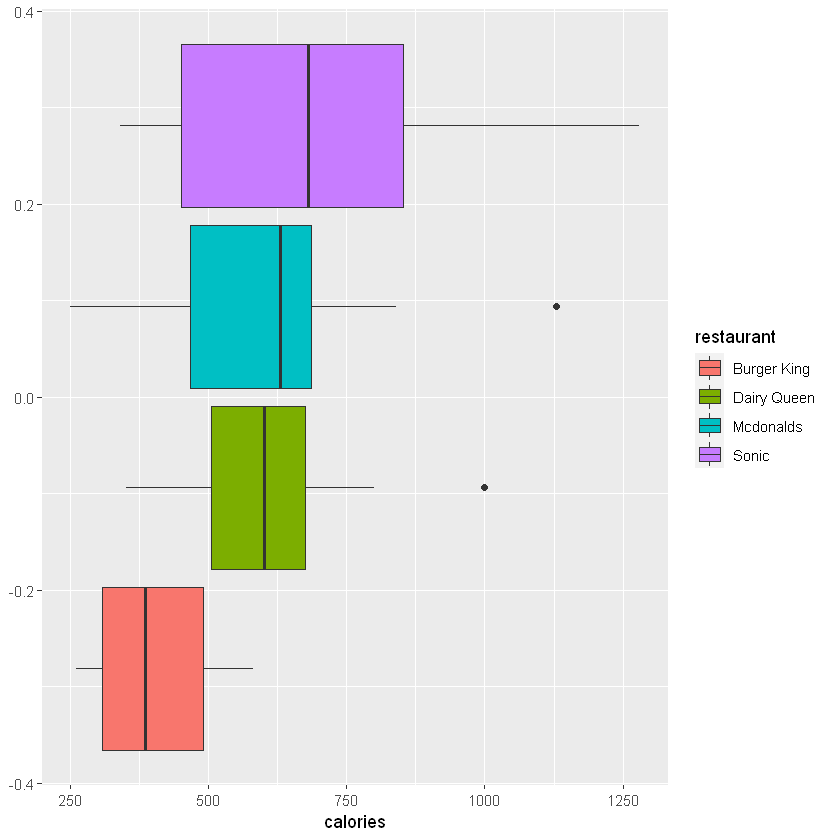

In [73]:
ggplot( data=burgers , mapping= aes(x=calories, fill=restaurant)) + 
     geom_boxplot() 

##### Two different options

* AOV function

In [74]:
aov( calories ~ restaurant , data=burgers )

Call:
   aov(formula = calories ~ restaurant, data = burgers)

Terms:
                restaurant Residuals
Sum of Squares    787987.6 2874310.6
Deg. of Freedom          3        52

Residual standard error: 235.1068
Estimated effects may be unbalanced

In [75]:
summary( aov( calories ~ restaurant , data=burgers ) )

            Df  Sum Sq Mean Sq F value  Pr(>F)   
restaurant   3  787988  262663   4.752 0.00529 **
Residuals   52 2874311   55275                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* Linear model

In [76]:
lm( calories ~ restaurant , data=burgers )


Call:
lm(formula = calories ~ restaurant, data = burgers)

Coefficients:
          (Intercept)  restaurantDairy Queen    restaurantMcdonalds  
                403.3                  203.3                  211.7  
      restaurantSonic  
                318.5  


In [77]:
summary( lm( calories ~ restaurant , data=burgers ) )


Call:
lm(formula = calories ~ restaurant, data = burgers)

Residuals:
    Min      1Q  Median      3Q     Max 
-381.82 -127.20  -11.82   87.80  558.18 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             403.33      67.87   5.943 2.37e-07 ***
restaurantDairy Queen   203.33      95.98   2.118 0.038934 *  
restaurantMcdonalds     211.67     100.67   2.103 0.040356 *  
restaurantSonic         318.48      84.37   3.775 0.000412 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 235.1 on 52 degrees of freedom
Multiple R-squared:  0.2152,	Adjusted R-squared:  0.1699 
F-statistic: 4.752 on 3 and 52 DF,  p-value: 0.005292


In [78]:
anova ( lm( calories ~ restaurant , data=burgers ) )

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
restaurant,3,787987.6,262662.5,4.751905,0.005292342
Residuals,52,2874310.6,55275.2,NA,NA


### What else to do?
- Check normality assumptions
- Check homocedasticity
- Independence
- Multiple comparisons

I created videos about testing LM assumptions with R:

https://youtu.be/lg7lD6YwdME

### Assumptions for ANOVA
To use the ANOVA test we made the following assumptions:

* Each group sample is drawn from a normally distributed population
* All populations have a common variance
* All samples are drawn independently of each other
* Within each sample, the observations are sampled randomly and independently of each other
* Factor effects are additive

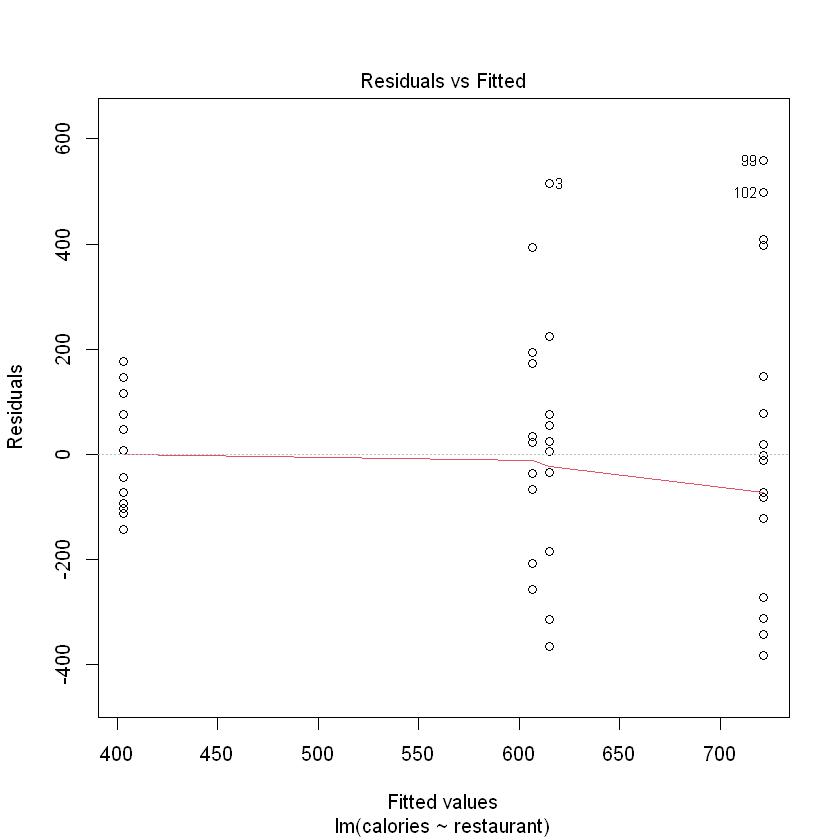

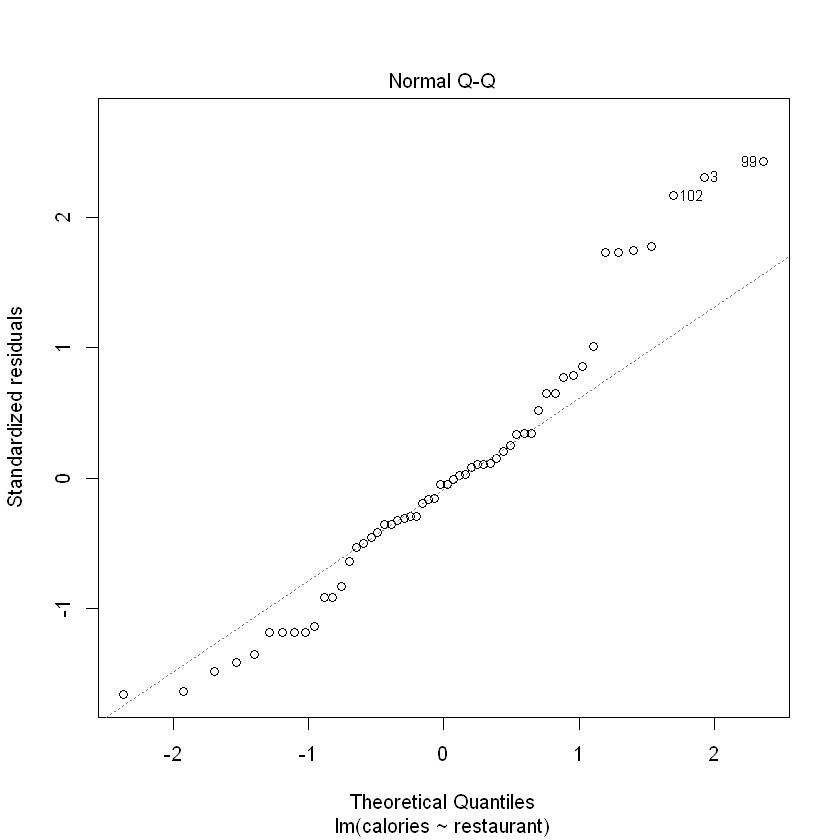

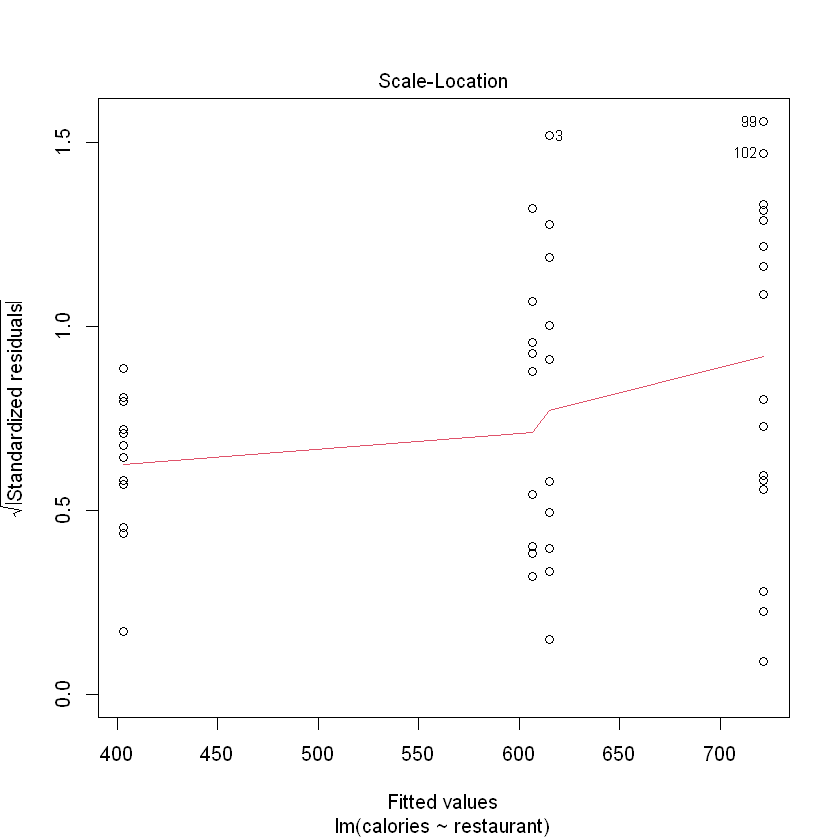

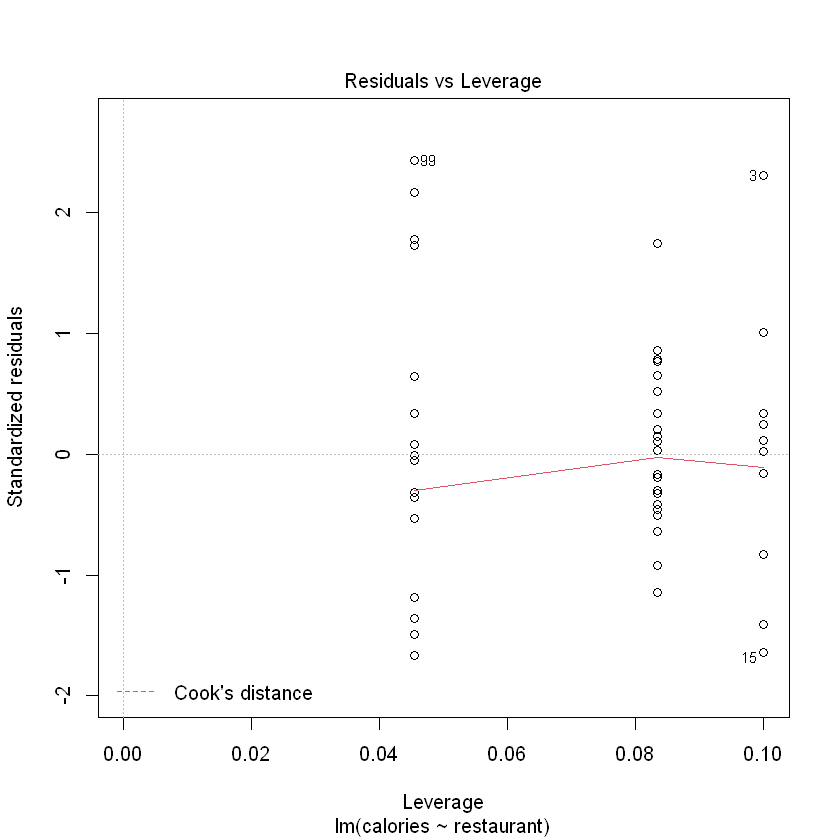

In [79]:
mymodel= lm( calories ~ restaurant , data=burgers )

plot(mymodel)

#### Normality

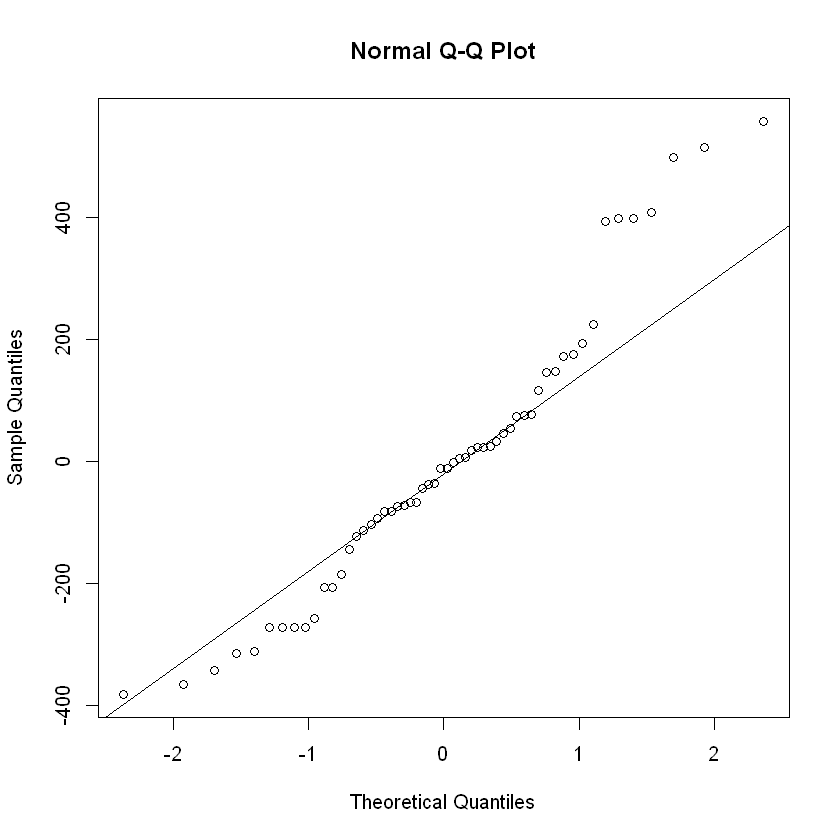

In [80]:
qqnorm(mymodel$residuals)
qqline(mymodel$residuals)

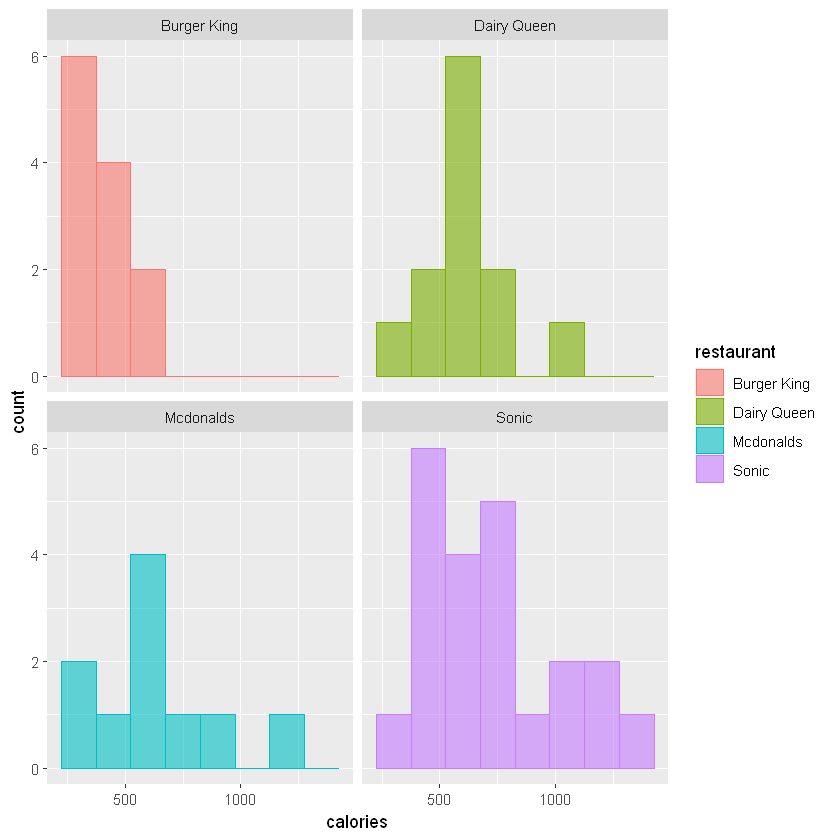

In [83]:
ggplot(data = burgers, aes(x=calories, color=restaurant, fill=restaurant)) + 
    
   geom_histogram(alpha=0.6, binwidth = 150)  +
 
facet_wrap(~restaurant)

In [84]:
library(rstatix)

burgers %>%
   group_by(restaurant) %>%
   shapiro_test(calories)     ##  function from rstatix packages,  if not use shapiro.test()


Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter




restaurant,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
Burger King,calories,0.9259667,0.33931331
Dairy Queen,calories,0.9454907,0.57227382
Mcdonalds,calories,0.9487306,0.65350494
Sonic,calories,0.9065982,0.04036796


#### Equality of Variance (Homocedasticity)

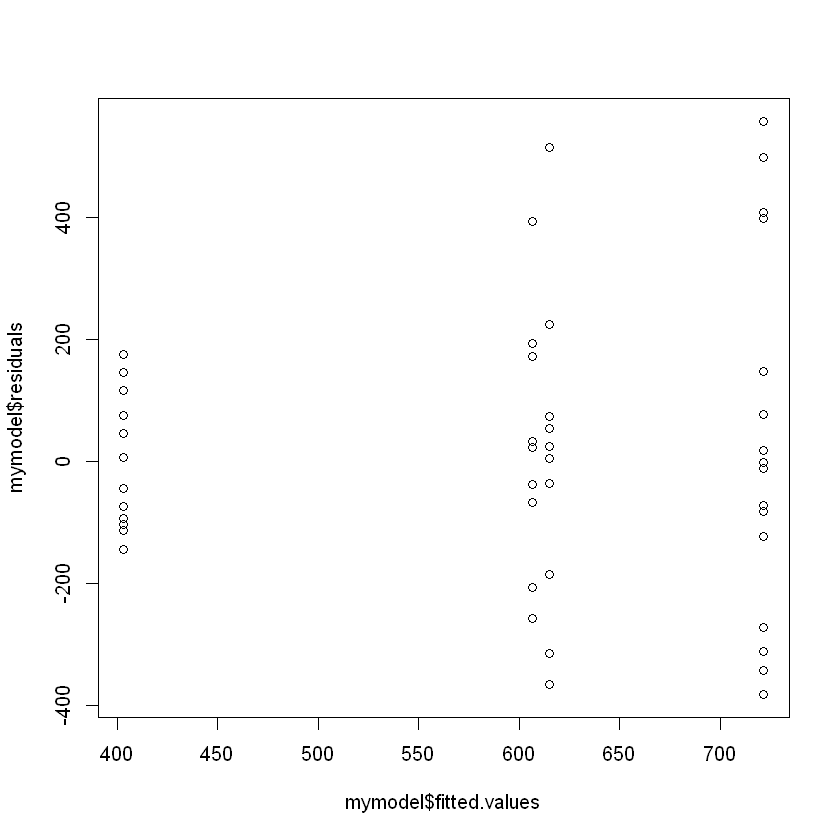

In [85]:
## constance variance

plot(mymodel$fitted.values,mymodel$residuals )

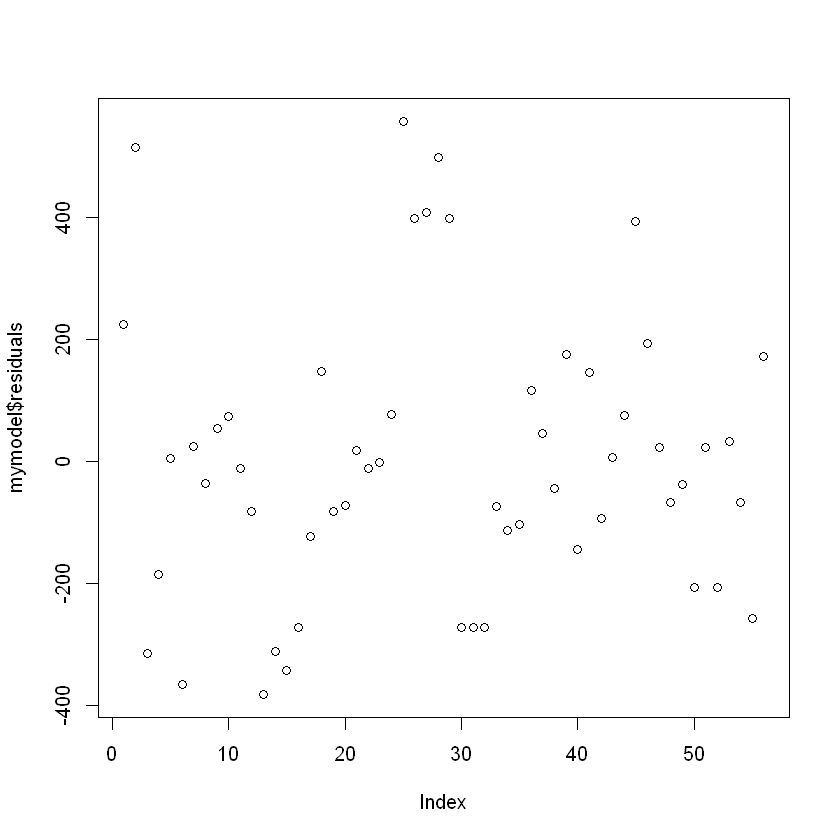

In [86]:
plot(mymodel$residuals)

#### It’s also possible to use Bartlett’s test or Levene’s test to check the homogeneity of variances.

We recommend Levene’s test, which is less sensitive to departures from normal distribution. 

In [87]:
library(stats)

bartlett.test( calories ~ restaurant, data = burgers)

# Performs Bartlett's test of the null that the variances in each of the groups (samples) are the same.


	Bartlett test of homogeneity of variances

data:  calories by restaurant
Bartlett's K-squared = 10.878, df = 3, p-value = 0.0124


In [88]:
library(car)
leveneTest( calories ~ restaurant, data = burgers)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,2.235859,0.09499652
,52,NA,NA


#### Outliers

In [89]:
library(rstatix)

burgers %>% 
  select(restaurant, item, calories) %>%
  group_by(restaurant) %>%
  identify_outliers(calories)

restaurant,item,calories,is.outlier,is.extreme
<chr>,<chr>,<int>,<lgl>,<lgl>
Dairy Queen,1/2 lb. FlameThrowerÂ® GrillBurger,1000,TRUE,FALSE
Mcdonalds,Double Bacon Smokehouse Burger,1130,TRUE,FALSE


## Multiple Comparison
##### Contrast

In [90]:
pairwise.t.test(burgers$calories, burgers$restaurant, p.adj = "none")  #p.adj = "bonf"


	Pairwise comparisons using t tests with pooled SD 

data:  burgers$calories and burgers$restaurant 

            Burger King Dairy Queen Mcdonalds
Dairy Queen 0.03893     -           -        
Mcdonalds   0.04036     0.93434     -        
Sonic       0.00041     0.17819     0.23895  

P value adjustment method: none 

#### TukeyHSD (Tukey Honest Significant Differences)

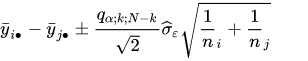

In [91]:
mymodel_aov = aov( calories ~ restaurant , data=burgers )

In [92]:
TukeyHSD(mymodel_aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = calories ~ restaurant, data = burgers)

$restaurant
                              diff        lwr      upr     p adj
Dairy Queen-Burger King 203.333333  -51.41224 458.0789 0.1607738
Mcdonalds-Burger King   211.666667  -55.51274 478.8461 0.1657846
Sonic-Burger King       318.484848   94.55099 542.4187 0.0022667
Mcdonalds-Dairy Queen     8.333333 -258.84607 275.5127 0.9997939
Sonic-Dairy Queen       115.151515 -108.78234 339.0854 0.5267645
Sonic-Mcdonalds         106.818182 -131.16481 344.8012 0.6350299


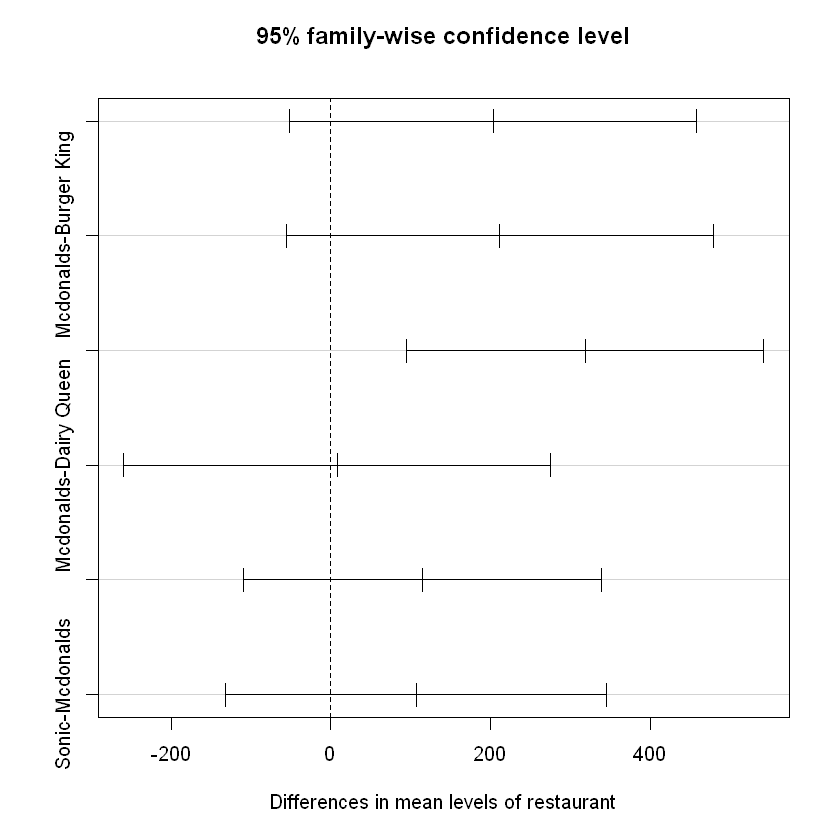

In [93]:
plot(TukeyHSD(mymodel_aov))

In [94]:
# install.packages("lsmeans")
library(lsmeans)

Loading required package: emmeans

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.



In [95]:
mymodel.lsm <- lsmeans(mymodel, ~restaurant)  # create the object

contrast(mymodel.lsm )  # spec="restaurant"  , "consec"

 contrast           estimate   SE df t.ratio p.value
 Burger King effect   -183.4 58.1 52 -3.153  0.0107 
 Dairy Queen effect     20.0 58.1 52  0.343  0.7328 
 Mcdonalds effect       28.3 62.0 52  0.456  0.7328 
 Sonic effect          135.1 48.3 52  2.796  0.0145 

P value adjustment: fdr method for 4 tests 

### Non parametric test:  Kruskal Wallis Test

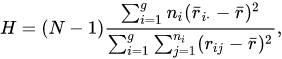

In [96]:
kruskal.test(calories ~ restaurant, data = burgers)


	Kruskal-Wallis rank sum test

data:  calories by restaurant
Kruskal-Wallis chi-squared = 13.943, df = 3, p-value = 0.002984


Interpret
* As the p-value is less than the significance level 0.05, we can conclude that there are significant differences between the treatment groups.

In [97]:
pairwise.wilcox.test( burgers$calories, burgers$restaurant, p.adjust.method = "BH" )


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  burgers$calories and burgers$restaurant 

            Burger King Dairy Queen Mcdonalds
Dairy Queen 0.0182      -           -        
Mcdonalds   0.0640      0.7917      -        
Sonic       0.0036      0.3504      0.3704   

P value adjustment method: BH 

# Two way anova

the two-way analysis of variance (ANOVA) is an extension of the one-way ANOVA that examines the influence of two different categorical independent variables on one continuous dependent variable

$ {\displaystyle Y_{ijk}\,|\,\mu _{ij},\sigma ^{2}\;{\overset {\mathrm {i.i.d.} }{\sim }}\;{\mathcal {N}}(\mu _{ij},\sigma ^{2})} $

$ \mu _{{ij}}=\mu +\alpha _{i}+\beta _{j}+\gamma _{{ij}} $

$ {\displaystyle Y_{ijk}=\mu _{ij}+\epsilon _{ijk}{\text{ with }}\epsilon _{ijk}{\overset {\mathrm {i.i.d.} }{\sim }}{\mathcal {N}}(0,\sigma ^{2})} $

Important assumption:  the mean of the response variable is influenced additively (if not interaction term) and linearly by the factors;

* H0: The means of all restaurant groups are equal
* H1: The mean of at least one restaurant is different


* H0: The means of the category groups are equal
* H1: The means of the category groups are different


* H0: There is no interaction between restaurant and category
* H1: There is interaction between the restaurant and category

In [98]:
fastfood= read.csv("fast_food.csv")   #  "path/file.csv"

In [99]:
dim(fastfood)

[1] 515  18

In [100]:
head(fastfood)

,X,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2,0.0,95,1110,44,3,11,37,4,20,20,Other
2,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17,1.5,130,1580,62,2,18,46,6,20,20,Other
3,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27,3.0,220,1920,63,3,18,70,10,20,50,Other
4,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0.5,155,1940,62,2,18,55,6,25,20,Other
5,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0.5,120,1980,81,4,18,46,6,20,20,Other
6,6,Mcdonalds,Big Mac,540,250,28,10,1.0,80,950,46,3,9,25,10,2,15,Other


In [101]:
xtable(  table( fastfood$restaurant), caption = 'Restaurants')

,V1
,<int>
Arbys,55
Burger King,70
Chick Fil-A,27
Dairy Queen,42
Mcdonalds,57
Sonic,53
Subway,96
Taco Bell,115


In [152]:
# Nested ifelse
library(stringr)


fastfood$category = ifelse( str_detect(fastfood$item,"Burger|burger|WHOPPER"), "Burger", 
       ifelse(str_detect(fastfood$item,"Sandwich"), "Sandwich", 
             ifelse(str_detect(fastfood$item,"Burrito"), "Burrito",
                    ifelse( str_detect(fastfood$item,"Salad"), "Salad",
                           ifelse( str_detect(fastfood$item,"Taco"), "Taco", "Other")   ) ) ) )

In [153]:
head(fastfood)

,X,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad,category
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2,0.0,95,1110,44,3,11,37,4,20,20,Other,Sandwich
2,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17,1.5,130,1580,62,2,18,46,6,20,20,Other,Burger
3,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27,3.0,220,1920,63,3,18,70,10,20,50,Other,Burger
4,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0.5,155,1940,62,2,18,55,6,25,20,Other,Sandwich
5,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0.5,120,1980,81,4,18,46,6,20,20,Other,Sandwich
6,6,Mcdonalds,Big Mac,540,250,28,10,1.0,80,950,46,3,9,25,10,2,15,Other,Other


In [154]:
xtable(  table( fastfood$category))

,V1
,<int>
Burger,62
Burrito,34
Other,260
Salad,62
Sandwich,72
Taco,25


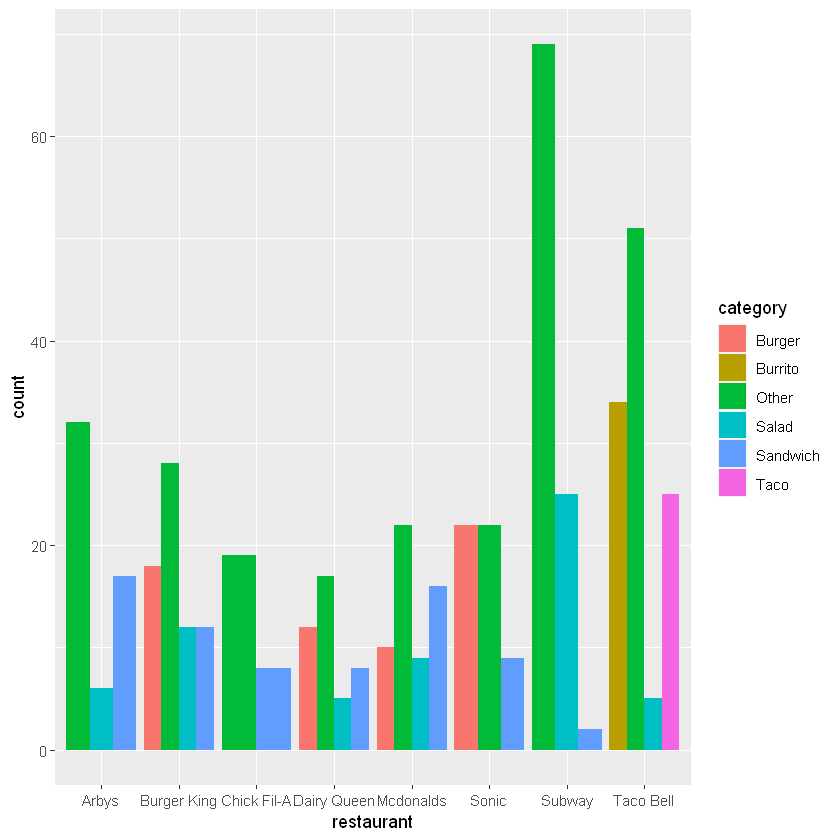

In [155]:
library(ggplot2)


ggplot(data=fastfood, aes( x=restaurant, fill=category)) + geom_bar(position="dodge")

#### Selecting only restaurants with three categories

In [156]:
fastfood3 = fastfood[ fastfood$restaurant %in% c("Burger King","Dairy Queen", "Mcdonalds"),] #, "Sonic"

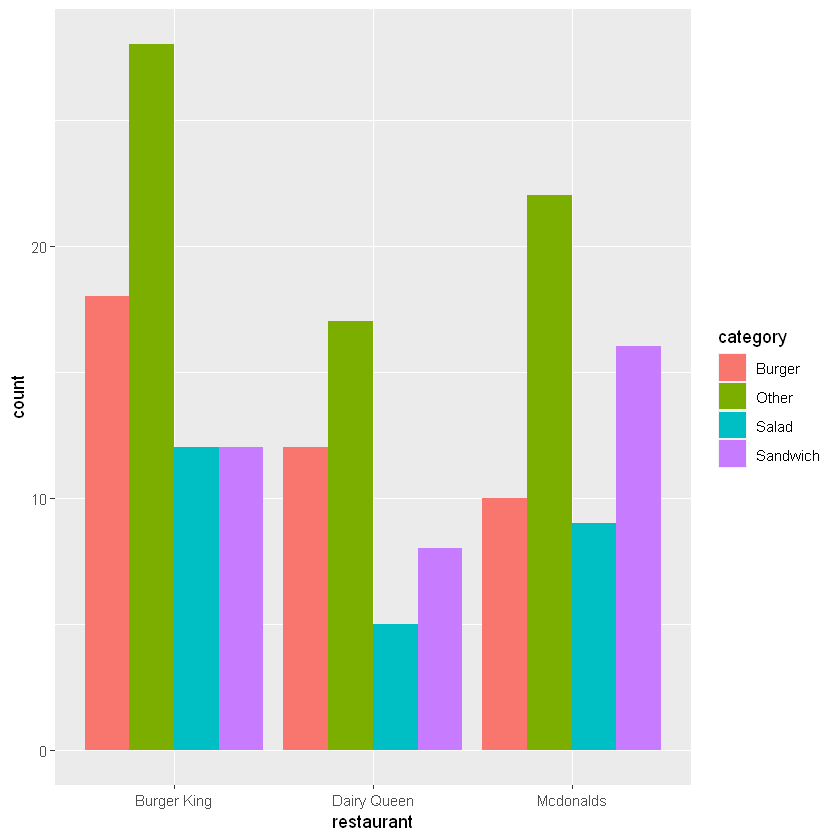

In [157]:
ggplot(data=fastfood3, aes( x=restaurant, fill=category)) + geom_bar(position="dodge")

In [158]:
tapply(fastfood3$calories,fastfood3$category,mean)

Burger    Other    Salad Sandwich 
557.5000 689.7015 406.5385 607.5000

In [160]:
fastfood3 %>%  #dplyr
  group_by(restaurant, category) %>%
   summarize(  mean = mean(calories))

`summarise()` regrouping output by 'restaurant' (override with `.groups` argument)



restaurant,category,mean
<chr>,<chr>,<dbl>
Burger King,Burger,492.7778
Burger King,Other,706.0714
Burger King,Salad,519.1667
Burger King,Sandwich,644.1667
Dairy Queen,Burger,606.6667
Dairy Queen,Other,541.7647
Dairy Queen,Salad,270.0000
Dairy Queen,Sandwich,501.2500
Mcdonalds,Burger,615.0000


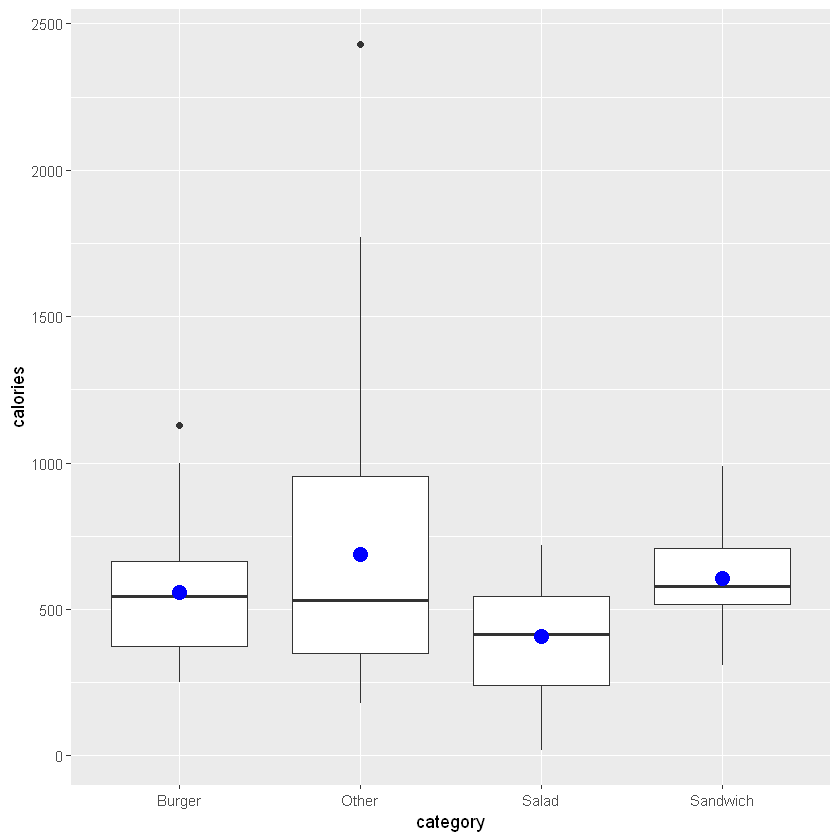

In [170]:
ggplot(data= fastfood3 , aes( x= category, y=calories)) + 
            geom_boxplot()+
            stat_summary(fun = "mean", colour = "blue", size=4,geom = "point")

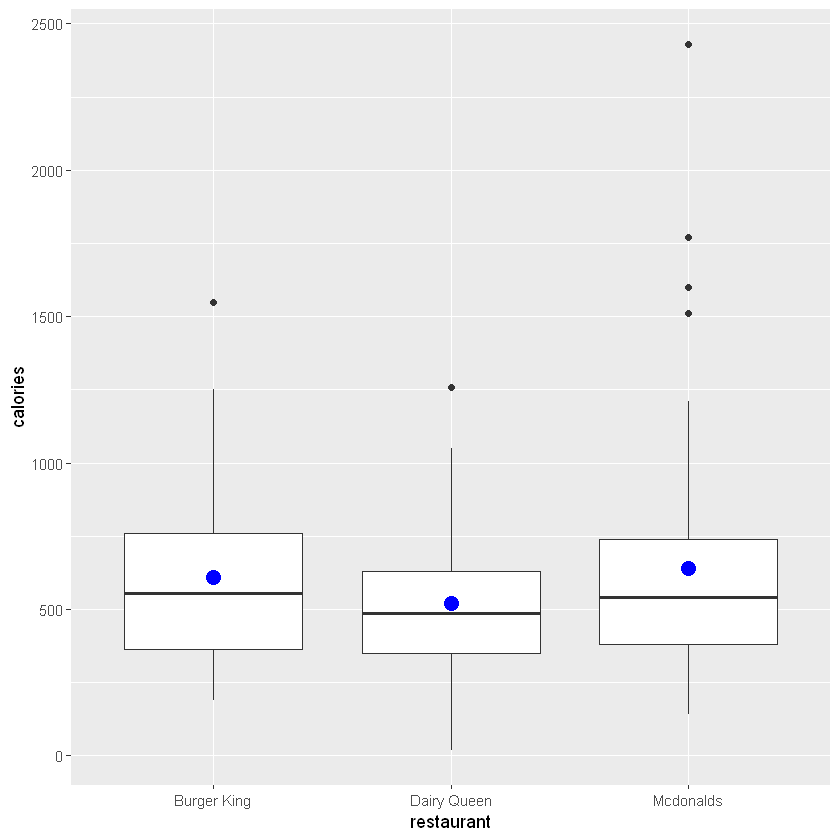

In [178]:
ggplot(data= fastfood3 , aes( x= restaurant, y=calories)) + 
            geom_boxplot()+
            stat_summary(fun = "mean", colour = "blue", size=4,geom = "point")

### INTERACTION

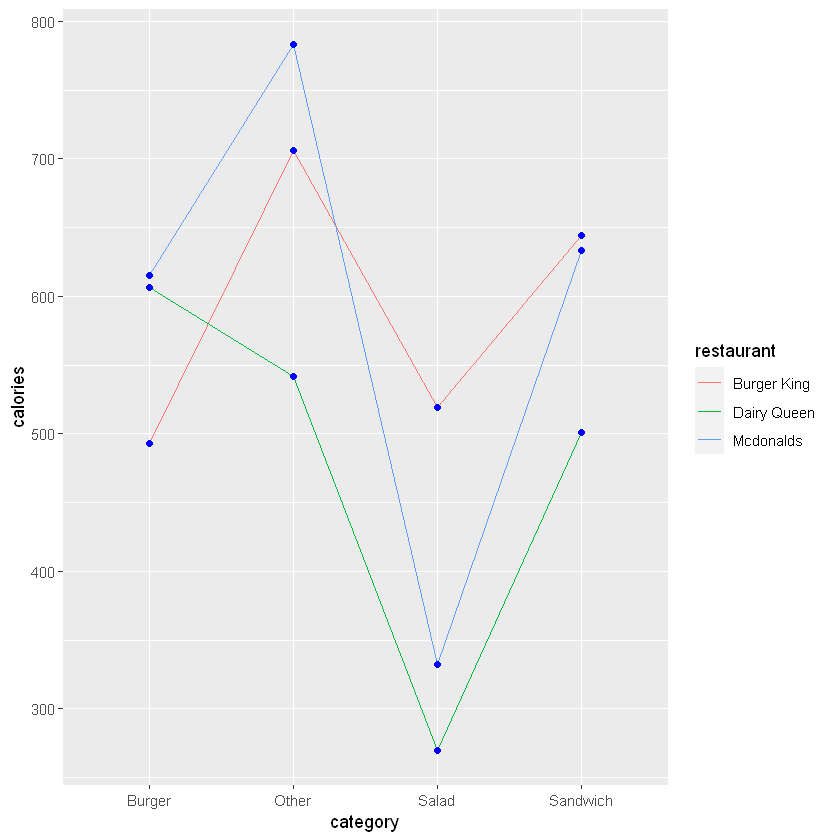

In [162]:
ggplot(data= fastfood3 , aes( x= category, y=calories, group= restaurant, color=restaurant)) + 
            #geom_point() +
            stat_summary(fun = "mean", geom = "line") +
            stat_summary(fun = "mean", colour = "blue", geom = "point")

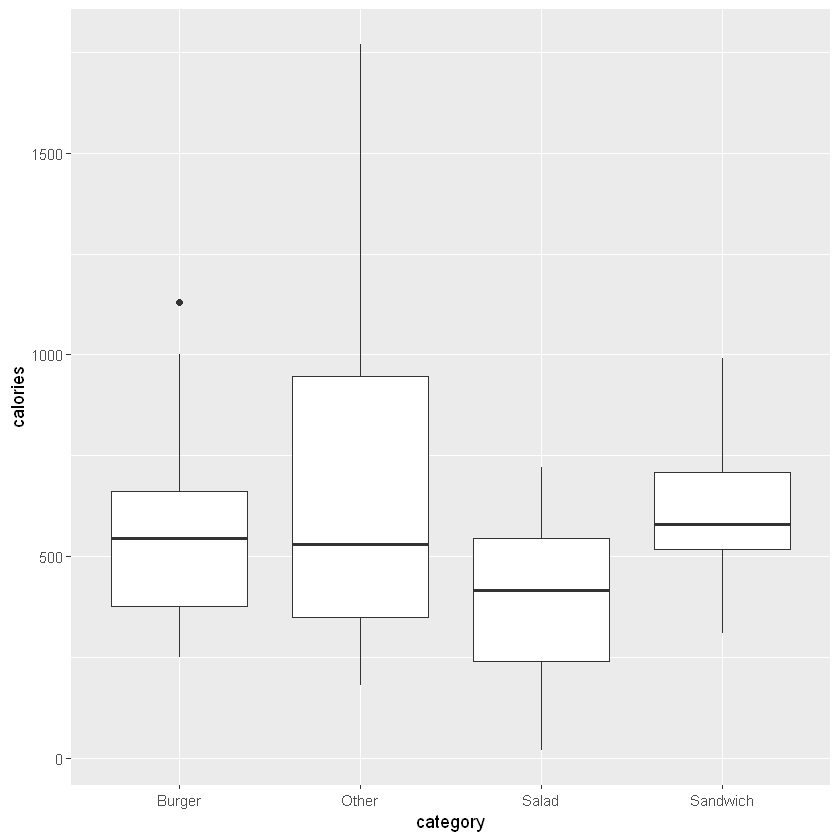

In [201]:
ggplot(data= fastfood3 , aes( x= category, y=calories)) + 
        geom_boxplot()

### DISTRIBUTION

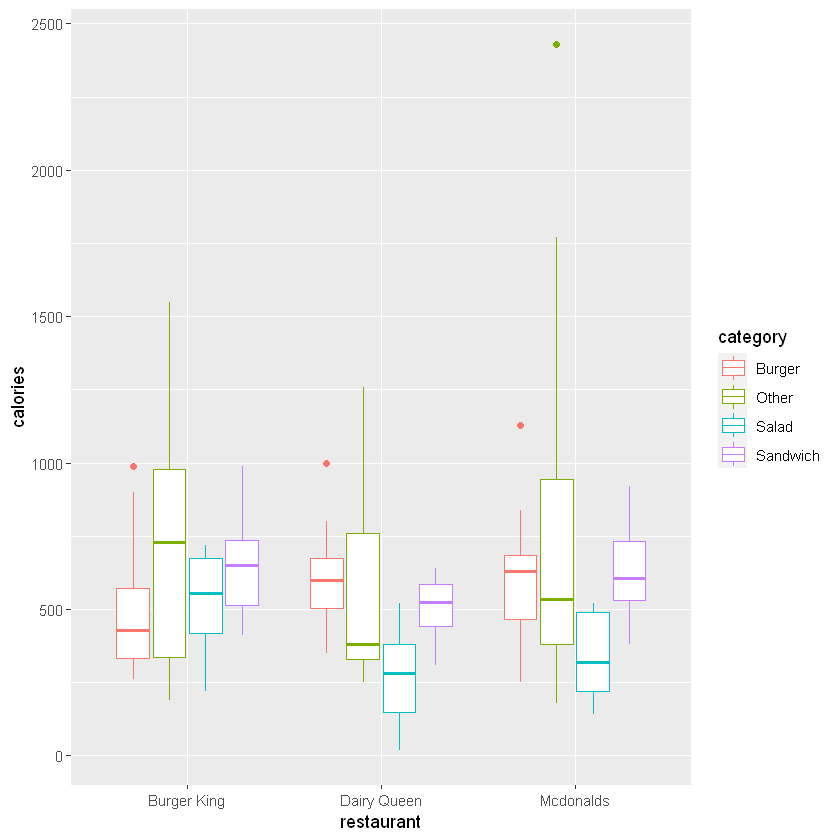

In [172]:
ggplot(data= fastfood3 , aes( x= restaurant, y=calories, color=category)) + 
            geom_boxplot()

In [171]:
fastfood3 %>%  #rstatx 
  select(restaurant, category, calories) %>%
  group_by(restaurant,category) %>%
  identify_outliers(calories)

restaurant,category,calories,is.outlier,is.extreme
<chr>,<chr>,<int>,<lgl>,<lgl>
Burger King,Burger,990,TRUE,FALSE
Dairy Queen,Burger,1000,TRUE,FALSE
Mcdonalds,Burger,1130,TRUE,FALSE
Mcdonalds,Other,2430,TRUE,FALSE


In [188]:
pos = which( fastfood3$restaurant=="Mcdonalds" & fastfood3$category=="Other" & fastfood3$calories==2430)
pos

[1] 40

In [189]:
fastfood3 = fastfood3[-pos,]  # remove element 40

In [190]:
fastfood3 %>%
  group_by(restaurant, category) %>%
    shapiro_test(calories)     ##  function from rstatix packages,  if not use shapiro.test()

restaurant,category,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
Burger King,Burger,calories,0.8785922,0.024720768
Burger King,Other,calories,0.9386358,0.102045890
Burger King,Salad,calories,0.8876171,0.109796183
Burger King,Sandwich,calories,0.9678397,0.886906317
Dairy Queen,Burger,calories,0.9454907,0.572273823
Dairy Queen,Other,calories,0.7972696,0.001861566
Dairy Queen,Salad,calories,0.9921768,0.986734102
Dairy Queen,Sandwich,calories,0.9318455,0.533023317
Mcdonalds,Burger,calories,0.9487306,0.653504938


In [206]:
leveneTest( calories ~ restaurant*category, data = fastfood3)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,11,3.018779,0.001120217
,156,NA,NA


In [204]:
fastfood3 %>%
  group_by(restaurant, category) %>%
   summarize(  SD = sd(calories))

`summarise()` regrouping output by 'restaurant' (override with `.groups` argument)



restaurant,category,SD
<chr>,<chr>,<dbl>
Burger King,Burger,214.0590
Burger King,Other,372.5522
Burger King,Salad,178.4508
Burger King,Sandwich,171.7005
Dairy Queen,Burger,187.2933
Dairy Queen,Other,327.0557
Dairy Queen,Salad,194.6792
Dairy Queen,Sandwich,116.5501
Mcdonalds,Burger,256.6991


### ANOVA two way with interaction

In [192]:
myanova2 = aov( calories ~ category*restaurant , data=fastfood3)
myanova2 

Call:
   aov(formula = calories ~ category * restaurant, data = fastfood3)

Terms:
                category restaurant category:restaurant Residuals
Sum of Squares   1281177     290068              597925  12838887
Deg. of Freedom        3          2                   6       156

Residual standard error: 286.8807
Estimated effects may be unbalanced

In [193]:
summary( myanova2 )

                     Df   Sum Sq Mean Sq F value  Pr(>F)   
category              3  1281177  427059   5.189 0.00192 **
restaurant            2   290068  145034   1.762 0.17506   
category:restaurant   6   597925   99654   1.211 0.30351   
Residuals           156 12838887   82301                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### ANOVA two way without interaction

In [194]:
myanova_no2= aov( calories ~ category + restaurant , data=fastfood3) 

In [195]:
summary( myanova_no2  )

             Df   Sum Sq Mean Sq F value Pr(>F)   
category      3  1281177  427059   5.149  0.002 **
restaurant    2   290068  145034   1.749  0.177   
Residuals   162 13436812   82943                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

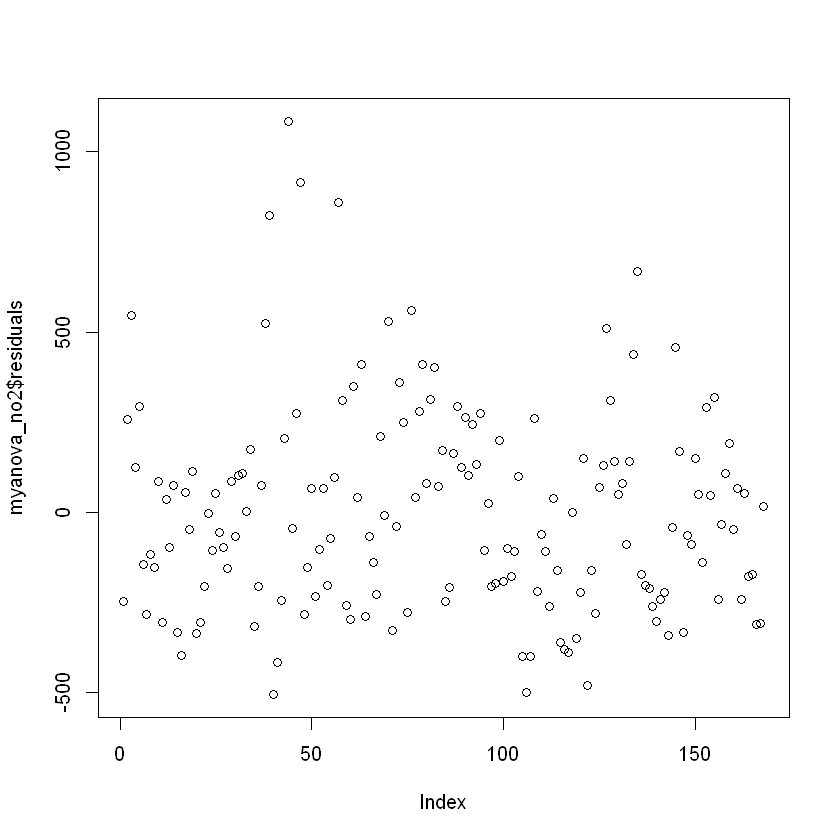

In [196]:
plot(myanova_no2$residuals)

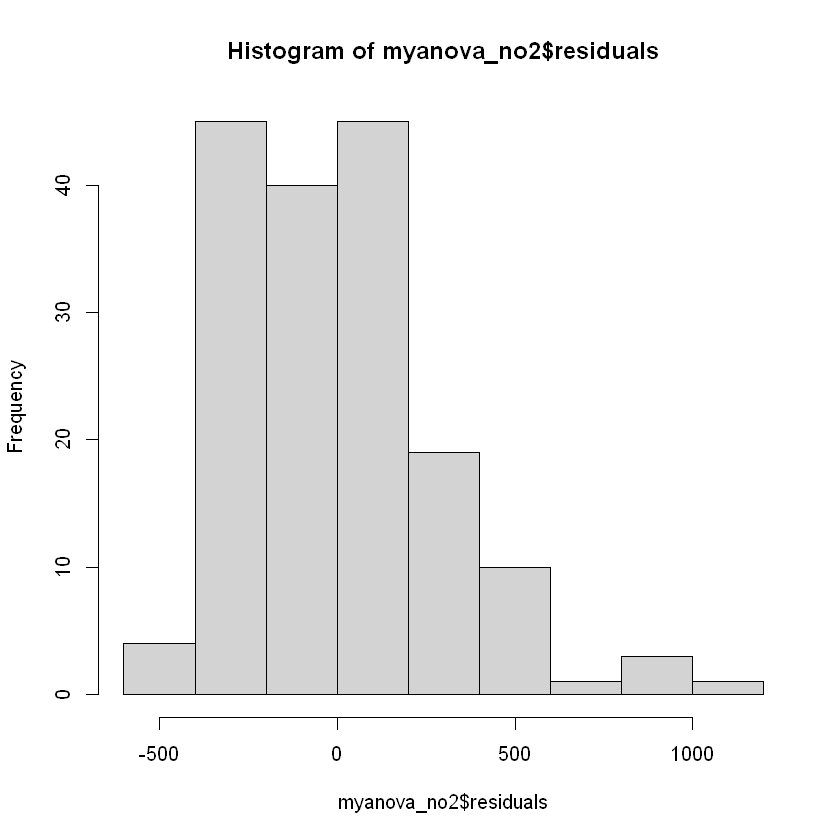

In [197]:
hist(myanova_no2$residuals)

### Multiple comparisons

In [198]:
TukeyHSD(myanova_no2)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = calories ~ category + restaurant, data = fastfood3)

$category
                      diff         lwr       upr     p adj
Other-Burger     105.83333  -43.972624 255.63929 0.2612727
Salad-Burger    -150.96154 -339.297569  37.37449 0.1637808
Sandwich-Burger   50.00000 -121.752736 221.75274 0.8741080
Salad-Other     -256.79487 -429.901376 -83.68837 0.0009645
Sandwich-Other   -55.83333 -210.734605  99.06794 0.7857148
Sandwich-Salad   200.96154    8.547819 393.37526 0.0369372

$restaurant
                              diff        lwr      upr     p adj
Dairy Queen-Burger King -97.697192 -230.66318  35.2688 0.1942541
Mcdonalds-Burger King    -4.864469 -127.00153 117.2726 0.9951187
Mcdonalds-Dairy Queen    92.832723  -46.22644 231.8919 0.2575849
